# Apple vs Google: A Comparative Sentiment Analysis in Tweets Related to Apple and Google Products

# Business understanding

In today’s digital age, social media platforms like Twitter provide a massive amount of real-time insights into consumer opinions, especially regarding products, brand  and services. For tech giants like Apple and Google, monitoring sentiment around their products can be a crucial business strategy. Understanding how consumers feel about their offerings—whether positively, negatively, or neutrally—helps inform marketing strategies, product development, and customer support.

## Project overview

## Business problem

Apple and Google are two of the most influential tech companies globally, with millions of users and customers who actively discuss their products on platforms like Twitter. However, manually analyzing sentiment in these discussions would be both time-consuming and impractical given the sheer volume of tweets. Therefore, automating sentiment analysis using an NLP model will allow both companies to process and understand consumer opinions quickly and at scale. This could give them a competitive edge by allowing for a timely response to customer feedback, identifying emerging issues, and improving customer satisfaction and brand loyalty

## Project objectives
### Main Objective

- The primary objective is to develop an NLP-based machine learning model that can accurately classify the sentiment of tweets related to Apple and Google products as positive, negative, or neutral.
### Specific Objectives




- Preprocess tweet data effectively (removing noise, handling stopwords, tokenization) to improve model accuracy.

- Build and evaluate multiple machine learning and deep learning models (Logistic Regression, Random Forest, Neural Network, LSTM) to classify tweet sentiments.

- Identify the best performing models and give recommendations.

## Justification

Understanding sentiment at scale is critical for organizations in highly competitive industries like tech. By automating the analysis of millions of tweets related to Apple and Google products, companies can quickly gauge customer satisfaction, identify emerging trends, and proactively address negative sentiments. Sentiment analysis also allows these companies to measure the impact of new product releases, marketing campaigns, and public relations efforts.

## Research questions

- What preprocessing techniques significantly improve model accuracy on tweet text?

- Which machine learning or deep learning model performs best in classifying tweet sentiments?

- How do different sentiment classes (positive, negative, neutral/no emotion) perform across models?



# Data understanding

## Data Collection
The dataset for this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 tweets labeled with sentiment (positive, negative, or neutral). These labeled examples provide a training set to build and evaluate the sentiment classification model. The data is enriched with various features such as tweet text, tweet ID, user ID, and the sentiment label, which is crucial for training the model.

To further improve the model, external data such as newer tweets about Apple and Google products or additional labeled sentiment datasets might be useful for retraining or fine-tuning.

### Load libraries

In [1]:
!pip install emoji
import pandas as pd
import re
import json
import emoji
import string
import nltk
import matplotlib.pyplot as plt
import tensorflow as tf

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Load the data

In [4]:
df = pd.read_csv("data/tweet_product_company.csv", encoding="latin-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [6]:
df.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5967,RT @mention HBD! If we all donated a dime... R...,NaN,No emotion toward brand or product
8128,&quot;#SXSW #privacybootcamp for startups with...,NaN,No emotion toward brand or product
5814,RT @mention Google could = search engines. Goo...,NaN,No emotion toward brand or product
8258,Is it just me or has the @mention client for A...,Android,Negative emotion
4493,Crowley and Cashmore think iPad 2 is a minor s...,iPad,Positive emotion


#  Data cleaning

## Correct formats

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- **tweet_text**: The data type `object` is appropriate as it contains text data.
- **emotion_in_tweet_is_directed_at**: The `object` type is suitable since it likely contains categorical or string values indicating emotion direction.
- **is_there_an_emotion_directed_at_a_brand_or_product**: The `object` type is correct as it likely holds categorical values (e.g., "Yes" or "No").


All columns have the correct data type (`object`) for their respective content.

## Missing Values

In [8]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

- The dataset has a total of 9093 rows.
- The **tweet_text** is the primary feature and is almost complete.
- The other two features have missing values and might require further preprocessing before use in sentiment analysis or classification tasks.



Removed blank row with the missing value in **tweet_text** since there is no tweet to draw sentiment from.

In [9]:
df.dropna(subset=["tweet_text"],inplace=True)
df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Replaced missing values on column **emotion_in_tweet_is_directed_at** with `'Unknown'`: Since we have over 60% of missing values in the ' emotion is directed at' column, we will assume the sentiments weren't directed toward any specific brand and fill the missing data with 'Unknown'.

In [10]:
product_names = df.emotion_in_tweet_is_directed_at.unique()
df.emotion_in_tweet_is_directed_at.fillna("Unknown",inplace=True)
df.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Keeping the original text

In [11]:
df["original_tweet"]= df.tweet_text

## Feature Engineering

### Removing unwanted Text

In [12]:
# cleaning unwanted characters
def remove_unwanted_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)
    return text


df['tweet_text'] = df['tweet_text'].apply(remove_unwanted_text)

df.tweet_text

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    ___RT @mention Google Tests Check-in Offers At...
Name: tweet_text, Length: 9092, dtype: object

### Lowercasing
Convert all `tweet_text` to lowercase to maintain consistency

In [13]:
df.tweet_text = df.tweet_text.str.lower()

We did Lowercasing to make texts uniform

**Converting Transcript to strings**

In [14]:
def transcription_to_strings(df):
    # matches basic sad face :(, :-(
    sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]')

    # matches crying face :'(, :'-(
    crying_face = re.compile(r'[:;8]?[\'\-]?\'\(')

    # matches complex sad faces with slashes, tears, etc.
    complex_sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]\)?')

    # edge case: faces with tears or creative symbols like T_T, TT_TT
    crying_edge_case = re.compile(r'(T_T|tt_t|TT_TT)')

    # apply pattern replacement across the DataFrame's text column
    df['tweet_text'] = df['tweet_text'].apply(lambda x:
        crying_edge_case.sub('crying face',
        complex_sad_face.sub('complex sad face',
        crying_face.sub('crying face',
        sad_face.sub('sad face', x)))))

transcription_to_strings(df)


- Translated emoticons into phrases like 'sad face', 'crying face' to preserve emotional context for sentimental analysis

**Dealing with emojis**

In [15]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = emoji.demojize(df.tweet_text.iloc[index])

- Changed emojis into text formart since emojis carry alot of meaning and helps models learn them.

**Replacing abbreviation with its full form**

In [16]:
# loading abbreviation dictionary from abbr.txt
with open('abbr.txt', 'r') as file:
    abbr_dict = json.load(file)

# expand abbreviations in a tweet
def expand_abbr_in_tweet(text):
    return " ".join([abbr_dict.get(word, word) for word in text.split()])

# apply the function to each tweet in the DataFrame
df['tweet_text'] = df['tweet_text'].apply(expand_abbr_in_tweet)

- Replaced abreviation with its full form so as they won't be removed as stopwords

### Removing Links
First check if there is any links

In [17]:
def text_processor(process, pattern):
    def extract_pattern(text):
        if isinstance(text, str):
            return re.findall(pattern, text)
        return []

    # apply pattern extraction
    links_list = df['tweet_text'].apply(extract_pattern)

    # flatten the list of lists
    all_links = [link for sublist in links_list for link in sublist]

    # check if anything was found
    if all_links:
        print(f"{process} found in the dataset: {len(all_links)} matches")
        print(all_links[:5])  # optional: show a few samples
    else:
        print(f"No {process} found.")

In [18]:
def remove_pattern(pattern):
    df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(pattern, '', x))

In [19]:
to_remove_or_check = "Links"
pattern = r'http\S+|www\S+'
text_processor(to_remove_or_check,pattern)

Links found in the dataset: 48 matches
['http://ht.ly/49n4m', 'http://bit.ly/ieavob', 'http://bit.ly/gvlrin', 'http://j.mp/grn7pk)', 'http://bit.ly/axzwxb']


Removing links found

In [20]:
remove_pattern(pattern)

Checking if any links are remaining

In [21]:
text_processor(to_remove_or_check,pattern)

No Links found.


**Removing Usernames**

Checking for twitter usernames

In [22]:
to_remove_or_check = "Usernames"
pattern = r'@\S+'
text_processor(to_remove_or_check,pattern)

Usernames found in the dataset: 7192 matches
['@wesley83', '@jessedee', '@fludapp', '@swonderlin', '@sxsw']


Removing Usernames

In [23]:
remove_pattern(pattern)

Checking if any usernames are remaining


In [24]:
text_processor(to_remove_or_check,pattern)

No Usernames found.


**Removing Hashtags**

Let us first check if there is any hashtags

In [25]:
to_remove_or_check = "Hashtags"
pattern = r'#\S+'
text_processor(to_remove_or_check,pattern)

Hashtags found in the dataset: 15853 matches
['#rise_austin,', '#sxsw.', '#sxsw', '#ipad', '#sxsw.']


Removing hashtags

In [26]:
remove_pattern(pattern)

In [27]:
text_processor(to_remove_or_check,pattern)

No Hashtags found.


**Removing Punctuation**

In [28]:
# removeD punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# applying the function to the tweet_text column
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)

**Removing Stopwords**

In [29]:
product_names = list(product_names)

In [30]:
#adding product names when there combined to accomodate such instances
product_names_joined = [str(name1).lower() + str(name2).lower() for name1 in product_names
                        for name2 in product_names if not pd.isna(name1) or not pd.isna(name2)]
product_names.extend(product_names_joined)
# converting all product names to lowercase
product_names= [str(name).lower() for name in product_names]


In [31]:
# getting stopwords
stopwords_list = stopwords.words('english')

#removing punctuation from stopwords since punctuation have been removed
stopwords_list= [word.translate(str.maketrans('', '', string.punctuation)) for word in stopwords_list]

# extending the list with lowercase product names
stopwords_list.extend(product_names)

In [32]:
for index in range(df.tweet_text.shape[0]):
    tweet_text = df.tweet_text.iloc[index].split()
    #removing stopwords from text
    tweet_no_stopword = " ".join([word for word in tweet_text if word not in stopwords_list])
    df.tweet_text.iloc[index] = tweet_no_stopword

**Removing Numbers**

In [33]:
for index in range(df.tweet_text.shape[0]):
    tweet = df.tweet_text.iloc[index].split()
    df.tweet_text.iloc[index] = " ".join([re.sub(r'\b\d+\b', '', text) for text in tweet])

In [34]:
# Comparing cleaned and original data
df[["tweet_text","original_tweet"]].head(10)

,tweet_text,original_tweet
0,3g hrs tweeting dead need upgrade plugin stat...,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know awesome application likely appreciate des...,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait also sale,@swonderlin Can not wait for #iPad 2 also. The...
3,hope years festival crashy years app,@sxsw I hope this year's festival isn't as cra...
4,great stuff fri marissa mayer tim oreilly tech...,@sxtxstate great stuff on Fri #SXSW: Marissa M...
5,new applications communication showcased confe...,@teachntech00 New iPad Apps For #SpeechTherapy...
7,starting around corner hop skip jump good time...,"#SXSW is just starting, #CTIA is around the co..."
8,beautifully smart simple idea retweet wrote ap...,Beautifully smart and simple idea RT @madebyma...
9,counting days plus strong canadian dollar mean...,Counting down the days to #sxsw plus strong Ca...
10,excited meet show sprint galaxy still running,Excited to meet the @samsungmobileus at #sxsw ...


- This displays side by side comparison of raw and cleaned tweets to verify the preprocessing pipeline

In [35]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,3g hrs tweeting dead need upgrade plugin stat...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know awesome application likely appreciate des...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait also sale,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,hope years festival crashy years app,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,great stuff fri marissa mayer tim oreilly tech...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


- The function is to confirm the above changes were executed successfully.
which shows that links, stopwords, punctuation, hashtags, usernames were dropped as is in tweet_text column

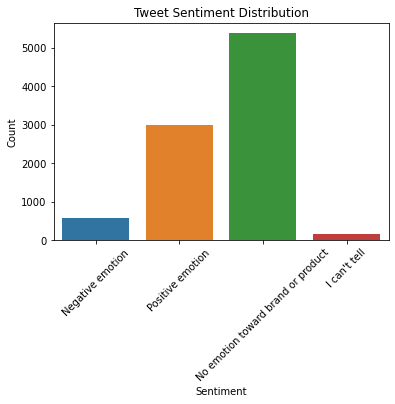

In [36]:
# sentiment distribution plot
import seaborn as sns
sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 'No emotion towards brand or product' had the highest count which shows that most sentiments/reaction given was generalized/neutral

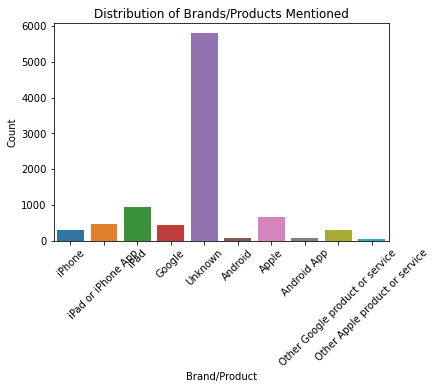

In [37]:
# distribution of brands/products mentioned countplot
sns.countplot(data=df, x='emotion_in_tweet_is_directed_at')
plt.title('Distribution of Brands/Products Mentioned')
plt.xlabel('Brand/Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The above plot shows the frequency of each product/brand mentions.
Most of the data had missing values on the brand/product column hence filling the blanks with unknown- in this case unknown showing that the sentiments did not mention any product/brand name.

### Tokenization

In [38]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = word_tokenize(df.tweet_text.iloc[index])

- The text was stripped down the tweet text into smaller units(tokens). Therefore allowing vectorization of the cleaned text which is a numerical representation of the tokens to capture the semantic meanings and relationship between words.

In [39]:
tokens = []
for index in range(df.tweet_text.shape[0]):
    text=df.tweet_text.iloc[index]
    for word in text:tokens.append(word)
# creating frequency distribution from the tokens
freqdist = FreqDist(tokens)

# getting 200 most common words
most_common = freqdist.most_common(200)

print(most_common)


[('link', 4284), ('retweet', 2903), ('store', 1465), ('new', 1093), ('austin', 842), ('amp', 722), ('application', 655), ('launch', 643), ('social', 623), ('popup', 597), ('today', 576), ('circles', 529), ('sxsw', 487), ('network', 462), ('via', 435), ('line', 401), ('get', 393), ('free', 364), ('called', 361), ('party', 332), ('major', 302), ('mobile', 300), ('like', 290), ('time', 272), ('one', 272), ('temporary', 264), ('opening', 256), ('people', 255), ('possibly', 244), ('great', 223), ('downtown', 222), ('see', 220), ('going', 218), ('day', 216), ('check', 215), ('maps', 214), ('go', 212), ('open', 210), ('need', 203), ('mayer', 203), ('marissa', 192), ('got', 183), ('know', 182), ('googles', 182), ('come', 174), ('applications', 168), ('win', 168), ('first', 166), ('good', 165), ('us', 162), ('pop', 160), ('ipad2', 159), ('next', 148), ('want', 146), ('love', 145), ('cool', 143), ('panel', 142), ('shop', 142), ('best', 140), ('design', 138), ('app', 135), ('game', 135), ('make',

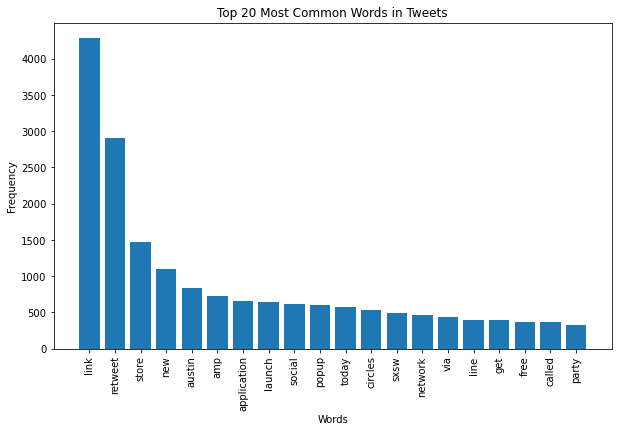

In [40]:
#  top 20 most common words for visualization barplot
top_20 = freqdist.most_common(20)

# splitting the words and their frequencies into separate lists
words, frequencies = zip(*top_20)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

- The bar plot gives a quick idea of the common word in the tweets.


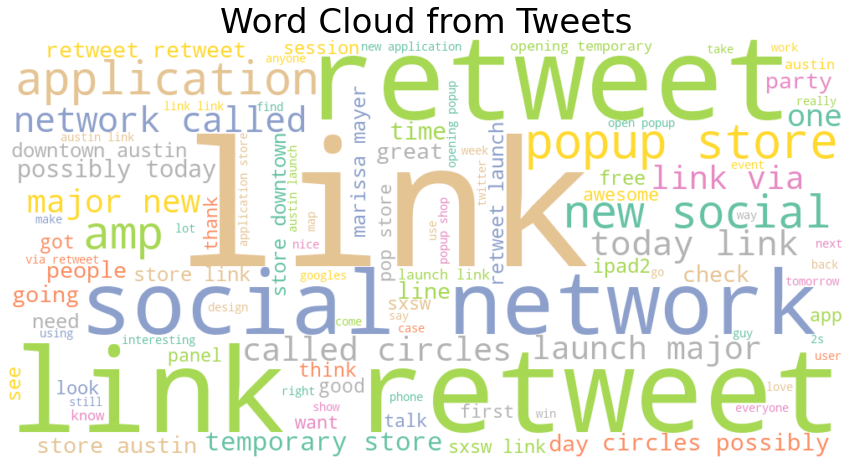

In [41]:
#merging all English text into one string for the word cloud
tweet_data = ' '.join(' '.join(t) for t in df['tweet_text'])
# generating the word cloud with text data
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      colormap='Set2',
                      max_words=100).generate(tweet_data)

# plotting
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Tweets', fontsize=34);

- The word cloud was used to create a visual summary of most used words.
the big fonts show the frequent used words in the tweets eg. link, link retweet, application.

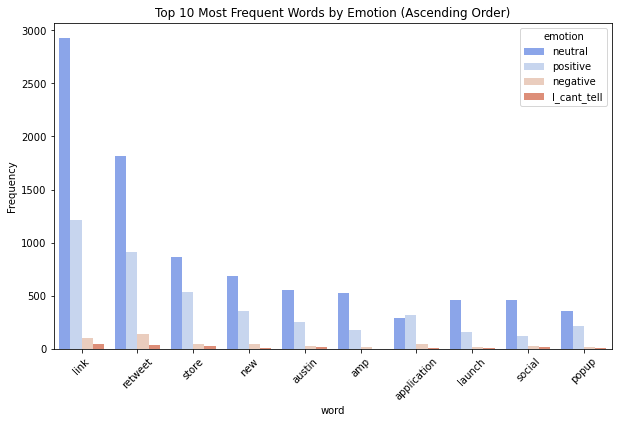

In [42]:
word_emotion_counts = {}

# iterating through each tweet
for index in range(df.shape[0]):
    text = df.tweet_text.iloc[index]
    emotion = df.is_there_an_emotion_directed_at_a_brand_or_product.iloc[index]

    for word in text:
        if word not in word_emotion_counts:
            word_emotion_counts[word] = [0, 0, 0, 0]  # [neutral, positive, negative, I can't tell]

        if emotion == 'No emotion toward brand or product':
            word_emotion_counts[word][0] += 1
        elif emotion == 'Positive emotion':
            word_emotion_counts[word][1] += 1
        elif emotion == 'Negative emotion':
            word_emotion_counts[word][2] += 1
        else :
            word_emotion_counts[word][3] += 1

word_emotion_counts
emotion_data = []
for word, counts in word_emotion_counts.items():
    emotion_data.append({'word': word, 'neutral': counts[0], 'positive': counts[1], 'negative': counts[2], 'I_cant_tell': counts[3]})

emotion_df = pd.DataFrame(emotion_data)

# getting the top 10 words by frequency (neutral + positive + negative counts)
top_words = emotion_df.set_index('word').sum(axis=1).nlargest(10).index
top_words_df = emotion_df[emotion_df['word'].isin(top_words)]

# reshape the dataFrame for plotting
top_words_melted = top_words_df.melt(id_vars='word', value_vars=['neutral', 'positive', 'negative', 'I_cant_tell'],
                                     var_name='emotion', value_name='count')

# bar plot with hue for emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', hue='emotion', data=top_words_melted, palette='coolwarm',
            order=top_words)
plt.title('Top 10 Most Frequent Words by Emotion (Ascending Order)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

- The word-sentiment mapping above was used to associate each word with how often it appears in 'positive', 'negative', 'no emotion' and 'I can't tell'

### Lemmatization

In [43]:
lemmatizer = WordNetLemmatizer()

for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index]
    tweet_text =[lemmatizer.lemmatize(word) for word in text]
    df.tweet_text.iloc[index] = tweet_text

- Lemmatization was used to normalize words to their base forms, reduce noise and improve interpretability.

In [44]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,"[3g, hr, tweeting, dead, need, upgrade, plugin...",iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,"[know, awesome, application, likely, appreciat...",iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,"[wait, also, sale]",iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,"[hope, year, festival, crashy, year, app]",iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"[great, stuff, fri, marissa, mayer, tim, oreil...",Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


## Vectorization/TF-IDF

In [46]:
# Prepared the text
texts = [" ".join(text) for text in df.tweet_text]

# CountVectorizer
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(texts)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vect.get_feature_names())
print("CountVectorizer:\n")
print(count_df)

# TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names())

CountVectorizer:

      0310apple  100  103011p  1045am3  10am  10k  10mins  10pm  10x  10x2  \
0             0    0        0        0     0    0       0     0    0     0   
1             0    0        0        0     0    0       0     0    0     0   
2             0    0        0        0     0    0       0     0    0     0   
3             0    0        0        0     0    0       0     0    0     0   
4             0    0        0        0     0    0       0     0    0     0   
...         ...  ...      ...      ...   ...  ...     ...   ...  ...   ...   
9087          0    0        0        0     0    0       0     0    0     0   
9088          0    0        0        0     0    0       0     0    0     0   
9089          0    0        0        0     0    0       0     0    0     0   
9090          0    0        0        0     0    0       0     0    0     0   
9091          0    0        0        0     0    0       0     0    0     0   

      ...  zite  zlf  zms  zombie  zomg  zone

- Converted tweet text into numerical features using countVectorizer and TF-IDF.
This emphasizes emotionally charged/ brand-specific terms that are rare but meaningful

In [47]:
top_n = 5

print("\nTF-IDF Vectorizer (Top Words per Document):\n")
for i, row in tfidf_df.iterrows():
    doc_tfidf = row[row > 0].sort_values(ascending=False).head(top_n).round(3)
    print(f"\nDocument {i + 1}:")
    print(doc_tfidf.reset_index().rename(columns={'index': 'Word', i: 'TF-IDF'}))


TF-IDF Vectorizer (Top Words per Document):


Document 1:
      Word  TF-IDF
0       hr   0.413
1   plugin   0.413
2  station   0.367
3  upgrade   0.363
4     dead   0.351

Document 2:
         Word  TF-IDF
0  appreciate   0.479
1      likely   0.430
2      giving   0.336
3        also   0.332
4      design   0.304

Document 3:
   Word  TF-IDF
0  sale   0.610
1  wait   0.561
2  also   0.560

Document 4:
       Word  TF-IDF
0      year   0.594
1    crashy   0.527
2  festival   0.387
3      hope   0.356
4       app   0.305

Document 5:
               Word  TF-IDF
0  booksconferences   0.361
1         mullenweg   0.361
2               fri   0.322
3         wordpress   0.322
4              matt   0.309

Document 6:
            Word  TF-IDF
0      showcased   0.552
1  communication   0.545
2     conference   0.515
3    application   0.269
4            new   0.246

Document 7:
     Word  TF-IDF
0     hop   0.420
1    skip   0.420
2    jump   0.393
3  corner   0.353
4     fan   0.318

Docume

4  austin   0.328

Document 70:
      Word  TF-IDF
0  fatigue   0.398
1   battle   0.352
2    added   0.332
3    value   0.325
4    based   0.309

Document 71:
          Word  TF-IDF
0     chilcott   0.372
1   mentioning   0.372
2        staff   0.329
3  competition   0.309
4       tshirt   0.309

Document 72:
    Word  TF-IDF
0  nifty   0.404
1  cream   0.355
2    ice   0.355
3   food   0.308
4   band   0.304

Document 73:
          Word  TF-IDF
0     gowallas   0.388
1  rewardstype   0.388
2      crossed   0.360
3      promise   0.350
4      groupon   0.336

Document 74:
        Word  TF-IDF
0    loosing   0.345
1   yahoocom   0.345
2  googlecom   0.334
3      doubt   0.292
4      weird   0.283

Document 75:
    Word  TF-IDF
0  holla   0.574
1   butt   0.520
2   ever   0.366
3   best   0.329
4  party   0.270

Document 76:
    Word  TF-IDF
0   cant   0.491
1  phone   0.467
2   case   0.466
3   love   0.447
4    get   0.351

Document 77:
      Word  TF-IDF
0  worship   0.983
1     link

      Word  TF-IDF
0  hopping   0.495
1       ta   0.417
2    thats   0.353
3    place   0.341
4   anyone   0.310

Document 145:
        Word  TF-IDF
0  louisiana   0.399
1    moonbot   0.399
2     studio   0.377
3    testing   0.347
4       beta   0.325

Document 146:
     Word  TF-IDF
0     ton   0.616
1  seeing   0.573
2     day   0.389
3     one   0.375

Document 147:
    Word  TF-IDF
0   bolt   0.360
1    32g   0.345
2     fo   0.325
3  cover   0.292
4  black   0.278

Document 148:
        Word  TF-IDF
0       trek   0.481
1      worth   0.366
2  wondering   0.361
3     chance   0.332
4     center   0.322

Document 149:
         Word  TF-IDF
0      manage   0.455
1       64gig   0.390
2      except   0.371
3  everything   0.345
4        wifi   0.334

Document 150:
            Word  TF-IDF
0          white   0.476
1  configuration   0.372
2           jean   0.328
3          known   0.322
4          64gig   0.295

Document 151:
          Word  TF-IDF
0  ninjafinder   0.484
1      of


Document 222:
        Word  TF-IDF
0        5pm   0.489
1     retail   0.485
2    release   0.419
3       open   0.314
4  temporary   0.310

Document 223:
         Word  TF-IDF
0  incredible   0.547
1        read   0.400
2         yet   0.365
3   available   0.359
4       phone   0.325

Document 224:
        Word  TF-IDF
0     reveal   0.544
1  wondering   0.493
2         gt   0.428
3    network   0.277
4     circle   0.267

Document 225:
      Word  TF-IDF
0    local   0.609
1   search   0.485
2  marissa   0.449
3    mayer   0.438

Document 226:
        Word  TF-IDF
0    closure   0.518
1  wondering   0.440
2     street   0.375
3       made   0.370
4       show   0.324

Document 227:
          Word  TF-IDF
0  circlesquot   0.602
1      another   0.473
2   quotgoogle   0.450
3           go   0.361
4       social   0.285

Document 228:
       Word  TF-IDF
0    inside   0.500
1      fire   0.495
2  question   0.442
3     whats   0.419
4       way   0.366

Document 229:
            Word 

3       link   0.159

Document 284:
        Word  TF-IDF
0     expert   0.556
1     school   0.536
2  marketing   0.516
3        via   0.340
4       link   0.150

Document 285:
        Word  TF-IDF
0  marketing   0.538
1     loathe   0.413
2       ltlt   0.365
3     expert   0.290
4       true   0.286

Document 286:
        Word  TF-IDF
0       cnet   0.563
1     expert   0.488
2     school   0.471
3  marketing   0.453
4       link   0.131

Document 287:
        Word  TF-IDF
0       cnet   0.510
1     expert   0.443
2     school   0.426
3       blog   0.423
4  marketing   0.411

Document 288:
       Word  TF-IDF
0  midnight   0.458
1   learned   0.422
2     there   0.372
3     still   0.333
4  downtown   0.288

Document 289:
       Word  TF-IDF
0  midnight   0.437
1     stock   0.405
2   learned   0.403
3      left   0.364
4     ipad2   0.295

Document 290:
       Word  TF-IDF
0  congress   0.854
1     store   0.440
2      link   0.277

Document 291:
         Word  TF-IDF
0  donglequot


Document 365:
      Word  TF-IDF
0    quiet   0.471
1    storm   0.471
2   seeing   0.362
3  forward   0.355
4  looking   0.308

Document 366:
        Word  TF-IDF
0  believing   0.415
1   verifone   0.398
2    carrier   0.375
3      nokia   0.375
4      nexus   0.333

Document 367:
      Word  TF-IDF
0    2quot   0.364
1    quoti   0.343
2  weekend   0.340
3    money   0.335
4     gave   0.333

Document 368:
         Word  TF-IDF
0  previewing   0.468
1        wave   0.388
2  networking   0.375
3        buzz   0.328
4        hope   0.303

Document 369:
         Word  TF-IDF
0  betterthey   0.742
1     improve   0.573
2        time   0.349

Document 370:
          Word  TF-IDF
0           cu   0.489
1        noobs   0.489
2  singularity   0.489
3       pacman   0.411
4       meetup   0.338

Document 371:
       Word  TF-IDF
0  positive   0.397
1     earth   0.349
2    beyond   0.342
3   sharing   0.336
4    action   0.288

Document 372:
       Word  TF-IDF
0   biggest   0.482
1  bring


Document 427:
           Word  TF-IDF
0  availability   0.367
1         chose   0.367
2         chunk   0.367
3  deliberately   0.367
4       knowing   0.340

Document 428:
            Word  TF-IDF
0             tv   0.545
1         hacker   0.338
2  extraordinary   0.327
3         league   0.327
4          stuff   0.304

Document 429:
      Word  TF-IDF
0    trump   0.484
1      tap   0.465
2   chunky   0.256
3  clarity   0.256
4  element   0.256

Document 430:
         Word  TF-IDF
0      schema   0.390
1   attending   0.376
2       stuff   0.368
3  navigation   0.349
4         far   0.347

Document 431:
     Word  TF-IDF
0   akqas   0.354
1     teo   0.354
2    lynn   0.342
3  hiring   0.337
4  schema   0.293

Document 432:
        Word  TF-IDF
0  designing   0.670
1      check   0.550
2       sxsw   0.455
3       link   0.206

Document 433:
         Word  TF-IDF
0      schema   0.502
1  navigation   0.449
2   interface   0.442
3   designing   0.422
4       check   0.347

Document 


Document 491:
        Word  TF-IDF
0   followed   0.450
1  margarita   0.450
2    closely   0.425
3  accessory   0.408
4        far   0.306

Document 492:
    Word  TF-IDF
0    fav   0.606
1    far   0.475
2  photo   0.441
3    one   0.341
4    amp   0.279

Document 493:
       Word  TF-IDF
0   brother   0.418
1     watch   0.348
2        rt   0.324
3  facebook   0.314
4       big   0.284

Document 494:
        Word  TF-IDF
0   throwing   0.425
1       fell   0.402
2  speakeasy   0.374
3        bit   0.367
4       nerd   0.323

Document 495:
          Word  TF-IDF
0  replacement   0.545
1       figure   0.482
2       making   0.393
3          way   0.342
4         year   0.318

Document 496:
         Word  TF-IDF
0        dslr   0.403
1        fame   0.403
2   moderated   0.403
3  discussion   0.330
4    kawasaki   0.306

Document 497:
        Word  TF-IDF
0     carpet   0.340
1         cw   0.340
2      dugan   0.340
3      mandy   0.340
4  groupedin   0.321

Document 498:
      Word


Document 554:
      Word  TF-IDF
0  tonight   0.630
1    going   0.534
2      see   0.527
3     link   0.200

Document 555:
       Word  TF-IDF
0     felix   0.375
1  housecat   0.375
2    golden   0.358
3        da   0.338
4     party   0.338

Document 556:
       Word  TF-IDF
0   applink   0.424
1     dwnld   0.389
2  anywhere   0.366
3      ride   0.358
4     enjoy   0.356

Document 557:
         Word  TF-IDF
0     busiest   0.433
1        spam   0.419
2          er   0.408
3  ridiculous   0.375
4       queue   0.321

Document 558:
        Word  TF-IDF
0   1986quot   0.555
1  quotparty   0.545
2       haha   0.460
3       like   0.297
4      party   0.283

Document 559:
      Word  TF-IDF
0  blowing   0.420
1     mind   0.320
2  gsdampm   0.313
3     food   0.289
4  amazing   0.285

Document 560:
            Word  TF-IDF
0  authenticator   0.574
1          ahead   0.476
2           step   0.431
3         device   0.373
4         mobile   0.272

Document 561:
          Word  TF-IDF



Document 621:
     Word  TF-IDF
0    know   0.439
1  20hour   0.362
2  little   0.312
3     wan   0.304
4      na   0.275

Document 622:
       Word  TF-IDF
0   honesty   0.400
1     loved   0.357
2      step   0.314
3  customer   0.304
4   keynote   0.303

Document 623:
        Word  TF-IDF
0       host   0.678
1  developer   0.508
2        day   0.385
3       sxsw   0.332
4       link   0.150

Document 624:
         Word  TF-IDF
0   degrading   0.358
1       maven   0.358
2  performing   0.358
3         sex   0.358
4      tminus   0.358

Document 625:
       Word  TF-IDF
0  donating   0.421
1  spending   0.417
2    dollar   0.403
3     japan   0.339
4       hey   0.308

Document 626:
        Word  TF-IDF
0    grossed   0.405
1       amid   0.387
2  strategic   0.387
3    revenue   0.351
4    account   0.324

Document 627:
     Word  TF-IDF
0    hint   0.530
1  answer   0.517
2   every   0.396
3    year   0.340
4     win   0.310

Document 628:
         Word  TF-IDF
0      popups   0.


Document 707:
        Word  TF-IDF
0       fret   0.632
1      owner   0.510
2       open   0.323
3  temporary   0.318
4        via   0.283

Document 708:
         Word  TF-IDF
0   disliking   0.554
1  shortening   0.554
2        auto   0.514
3     twitter   0.332
4        link   0.105

Document 709:
         Word  TF-IDF
0  positively   0.620
1     happily   0.593
2     clearly   0.514

Document 710:
        Word  TF-IDF
0      carny   0.707
1  clipboard   0.707

Document 711:
         Word  TF-IDF
0   competing   0.454
1    resonant   0.454
2  socialflow   0.454
3       board   0.419
4       topic   0.399

Document 712:
         Word  TF-IDF
0  developing   0.595
1     version   0.497
2   flipboard   0.496
3         say   0.391

Document 713:
        Word  TF-IDF
0       amid   0.470
1    glowing   0.470
2        ie9   0.426
3       logo   0.398
4  microsoft   0.348

Document 714:
          Word  TF-IDF
0  overheating   0.512
1     sounding   0.490
2      british   0.463
3        te


Document 788:
       Word  TF-IDF
0      gtgt   0.479
1      good   0.339
2  possibly   0.313
3     major   0.298
4    called   0.286

Document 789:
       Word  TF-IDF
0   network   0.445
1    social   0.415
2    course   0.394
3   another   0.344
4  possibly   0.259

Document 790:
       Word  TF-IDF
0  possibly   0.386
1     major   0.369
2    called   0.353
3   network   0.332
4    circle   0.321

Document 791:
       Word  TF-IDF
0  possibly   0.379
1     major   0.362
2    called   0.347
3   network   0.327
4    circle   0.316

Document 792:
       Word  TF-IDF
0  possibly   0.366
1     major   0.349
2    called   0.335
3       via   0.321
4   network   0.315

Document 793:
       Word  TF-IDF
0  possibly   0.366
1     major   0.349
2    called   0.335
3       via   0.321
4   network   0.315

Document 794:
       Word  TF-IDF
0  possibly   0.366
1     major   0.349
2    called   0.335
3       via   0.321
4   network   0.315

Document 795:
       Word  TF-IDF
0  possibly   0.366


      Word  TF-IDF
0  wpeople   0.419
1      wtf   0.364
2   effort   0.352
3  helping   0.340
4   global   0.336

Document 859:
        Word  TF-IDF
0  unabashed   0.518
1         ta   0.394
2       gtgt   0.389
3      begin   0.331
4       even   0.298

Document 860:
        Word  TF-IDF
0      geeky   0.607
1       love   0.357
2   downtown   0.327
3    opening   0.317
4  temporary   0.316

Document 861:
              Word  TF-IDF
0  conferencesquot   0.378
1        quotapple   0.355
2       technology   0.352
3             ever   0.334
4            heard   0.323

Document 862:
              Word  TF-IDF
0  conferencesquot   0.378
1        quotapple   0.355
2       technology   0.352
3             ever   0.334
4            heard   0.323

Document 863:
         Word  TF-IDF
0         n33   0.554
1  120035959p   0.432
2        town   0.399
3       valid   0.366
4        code   0.334

Document 864:
        Word  TF-IDF
0   deadline   0.334
1    lurking   0.334
2  sketchily   0.334
3   

4     major   0.235

Document 927:
         Word  TF-IDF
0         c34   0.546
1     retreat   0.522
2  120035959p   0.425
3       valid   0.360
4        code   0.329

Document 928:
    Word  TF-IDF
0    1of   0.530
1   move   0.382
2  smart   0.335
3   many   0.325
4  rumor   0.295

Document 929:
             Word  TF-IDF
0       bandwagon   0.436
1         hopping   0.393
2         groupon   0.378
3     quotgroupon   0.340
4  socialtypequot   0.337

Document 930:
        Word  TF-IDF
0  launching   0.708
1    product   0.666
2       link   0.232

Document 931:
        Word  TF-IDF
0   partying   0.683
1   anything   0.560
2  launching   0.446
3       link   0.146

Document 932:
        Word  TF-IDF
0  surprised   0.405
1    spotted   0.390
2      three   0.386
3      table   0.376
4      droid   0.362

Document 933:
      Word  TF-IDF
0      buy   0.745
1    begin   0.411
2     even   0.370
3      win   0.316
4  retweet   0.153

Document 934:
         Word  TF-IDF
0    farooqui   0.3

4   strategy   0.312

Document 1000:
          Word  TF-IDF
0  iamtimbaker   0.538
1        1980s   0.514
2    instagram   0.440
3        photo   0.324
4       google   0.280

Document 1001:
         Word  TF-IDF
0  government   0.444
1       theme   0.413
2        pick   0.364
3      trying   0.331
4        data   0.324

Document 1002:
       Word  TF-IDF
0  positive   0.426
1  planning   0.413
2     super   0.377
3   preview   0.333
4       far   0.320

Document 1003:
           Word  TF-IDF
0  concertgoers   0.530
1      mashable   0.487
2      platform   0.396
3          time   0.296
4          sxsw   0.263

Document 1004:
          Word  TF-IDF
0         swsx   0.486
1  electronics   0.470
2          non   0.449
3         spot   0.376
4         play   0.349

Document 1005:
   Word  TF-IDF
0  play   0.669
1  game   0.534
2  need   0.483
3  link   0.184

Document 1006:
        Word  TF-IDF
0      grown   0.481
1        men   0.469
2       lego   0.436
3  speakeasy   0.412
4    playi


Document 1067:
    Word  TF-IDF
0  ilink   0.480
1  dwnld   0.406
2   ride   0.374
3    saw   0.324
4  booth   0.294

Document 1068:
        Word  TF-IDF
0  sxswilink   0.479
1      dwnld   0.418
2       ride   0.385
3        saw   0.334
4      booth   0.303

Document 1069:
    Word  TF-IDF
0  drunk   0.753
1    say   0.470
2    got   0.461

Document 1070:
         Word  TF-IDF
0  suggestion   0.366
1      though   0.353
2    computer   0.342
3    internet   0.328
4        wifi   0.310

Document 1071:
         Word  TF-IDF
0    schedorg   0.372
1       sched   0.361
2       count   0.344
3       click   0.319
4  unofficial   0.309

Document 1072:
              Word  TF-IDF
0  applicationquot   0.512
1       quotupload   0.512
2          current   0.453
3          browser   0.387
4           screen   0.347

Document 1073:
       Word  TF-IDF
0   grabbed   0.581
1      seat   0.535
2  ballroom   0.438
3      hear   0.429

Document 1074:
      Word  TF-IDF
0    trial   0.479
1  several  

2  link   0.448

Document 1140:
     Word  TF-IDF
0   seems   0.517
1  pretty   0.515
2    game   0.406
3    cool   0.404
4   check   0.373

Document 1141:
       Word  TF-IDF
0      crap   0.449
1       lt3   0.449
2      holy   0.412
3  showcase   0.403
4   torrent   0.403

Document 1142:
        Word  TF-IDF
0  dangerous   0.788
1       apps   0.591
2       link   0.169

Document 1143:
        Word  TF-IDF
0  dangerous   0.788
1       apps   0.591
2       link   0.169

Document 1144:
    Word  TF-IDF
0    tom   0.448
1  setup   0.417
2   crew   0.390
3   word   0.381
4    5pm   0.378

Document 1145:
            Word  TF-IDF
0         hacker   0.425
1  extraordinary   0.411
2         league   0.411
3           view   0.369
4           back   0.335

Document 1146:
        Word  TF-IDF
0       flew   0.459
1       fact   0.429
2  hopefully   0.410
3       pick   0.367
4      thing   0.278

Document 1147:
          Word  TF-IDF
0       agenda   0.449
1      offline   0.434
2  applicatio

       Word  TF-IDF
0      even   0.441
1  floating   0.383
2      zero   0.366
3       one   0.357
4  thousand   0.326

Document 1203:
       Word  TF-IDF
0  macworld   0.518
1   spotted   0.419
2     three   0.415
3    minute   0.361
4       lot   0.315

Document 1204:
    Word  TF-IDF
0  ghost   0.487
1  three   0.408
2   type   0.408
3    kid   0.382
4    bad   0.352

Document 1205:
        Word  TF-IDF
0       free   0.428
1       beat   0.396
2  excellent   0.382
3       hard   0.351
4      march   0.327

Document 1206:
        Word  TF-IDF
0     remove   0.406
1        4pm   0.396
2  corporate   0.380
3    account   0.352
4        pro   0.334

Document 1207:
       Word  TF-IDF
0  acoustic   0.368
1      solo   0.358
2       cst   0.354
3       vip   0.341
4       1pm   0.338

Document 1208:
          Word  TF-IDF
0     paradigm   0.507
1  interaction   0.472
2       discus   0.460
3    listening   0.391
4    designing   0.346

Document 1209:
        Word  TF-IDF
0  listening   

3    know   0.360

Document 1264:
        Word  TF-IDF
0       info   0.498
1  available   0.473
2   facebook   0.463
3     mobile   0.357
4      today   0.300

Document 1265:
       Word  TF-IDF
0      fond   0.626
1    quotim   0.567
2  ipadquot   0.536

Document 1266:
        Word  TF-IDF
0      screw   0.533
1     circus   0.506
2  important   0.455
3        big   0.348
4     social   0.246

Document 1267:
        Word  TF-IDF
0      screw   0.515
1     circus   0.489
2  important   0.439
3        big   0.336
4        via   0.259

Document 1268:
        Word  TF-IDF
0   touching   0.510
1   magazine   0.425
2      story   0.400
3  designing   0.355
4    digital   0.345

Document 1269:
        Word  TF-IDF
0        tag   0.518
1  destroyed   0.286
2  lttitlegt   0.286
3   protocol   0.286
4     trajan   0.286

Document 1270:
      Word  TF-IDF
0   family   0.430
1   finder   0.408
2  created   0.404
3  contact   0.396
4   trying   0.339

Document 1271:
     Word  TF-IDF
0    tune   


Document 1335:
        Word  TF-IDF
0  disgusted   0.431
1     strong   0.362
2   minister   0.339
3    iphones   0.336
4      prime   0.336

Document 1336:
        Word  TF-IDF
0  quotpopup   0.464
1  storequot   0.434
2      south   0.357
3      whats   0.333
4     street   0.321

Document 1337:
        Word  TF-IDF
0   passerby   0.393
1  witnessed   0.393
2   detailed   0.363
3  inventory   0.350
4   homeless   0.341

Document 1338:
      Word  TF-IDF
0     bing   0.487
1  invited   0.371
2    chair   0.360
3     ouch   0.360
4    third   0.331

Document 1339:
        Word  TF-IDF
0  dashboard   0.581
1       data   0.467
2       like   0.335
3       govt   0.313
4      score   0.290

Document 1340:
       Word  TF-IDF
0      bday   0.469
1      dead   0.376
2      card   0.336
3     happy   0.330
4  business   0.323

Document 1341:
      Word  TF-IDF
0   andoid   0.413
1    award   0.362
2   choice   0.362
3  gowalla   0.351
4      yes   0.317

Document 1342:
        Word  TF-IDF

Document 1400:
       Word  TF-IDF
0      done   0.588
1       100   0.354
2     reply   0.354
3  composed   0.346
4     email   0.301

Document 1401:
         Word  TF-IDF
0        ning   0.392
1      roadie   0.392
2     insider   0.379
3    thrilled   0.370
4  unofficial   0.325

Document 1402:
      Word  TF-IDF
0   people   0.669
1     work   0.557
2   rather   0.377
3       gt   0.297
4  retweet   0.108

Document 1403:
        Word  TF-IDF
0      fixed   0.372
1  headsdown   0.372
2       neck   0.345
3   shoulder   0.345
4        wmy   0.345

Document 1404:
        Word  TF-IDF
0  impromptu   0.462
1    learned   0.375
2      start   0.344
3       wait   0.314
4       cant   0.306

Document 1405:
         Word  TF-IDF
0  planetquot   0.491
1  quotaustin   0.491
2   currently   0.407
3      lonely   0.380
4       guide   0.322

Document 1406:
        Word  TF-IDF
0   quotlike   0.432
1  boyfriend   0.399
2      three   0.362
3    believe   0.341
4      since   0.322

Document 140

          Word  TF-IDF
0        music   0.418
1  everywherei   0.368
2         cute   0.332
3         yeah   0.287
4         girl   0.276

Document 1473:
        Word  TF-IDF
0      shite   0.502
1     sponso   0.502
2       cont   0.340
3   includes   0.313
4  uberguide   0.313

Document 1474:
        Word  TF-IDF
0        ton   0.375
1     course   0.365
2     ipad2s   0.360
3  brilliant   0.345
4    setting   0.342

Document 1475:
        Word  TF-IDF
0   preorder   0.369
1     spring   0.369
2  releasing   0.362
3      break   0.347
4     friday   0.295

Document 1476:
        Word  TF-IDF
0  brilliant   0.376
1       core   0.352
2     action   0.335
3       sell   0.334
4       shop   0.292

Document 1477:
        Word  TF-IDF
0    bearded   0.510
1  hilarious   0.489
2      plaid   0.489
3       look   0.307
4        guy   0.305

Document 1478:
              Word  TF-IDF
0            hmmmm   0.551
1  quotcirclesquot   0.436
2         possibly   0.306
3            major   0.292
4


Document 1536:
           Word  TF-IDF
0           tix   0.417
1  tvontheradio   0.417
2    postscript   0.386
3     beautiful   0.341
4          yall   0.330

Document 1537:
     Word  TF-IDF
0    site   0.513
1  medium   0.498
2     wow   0.489
3  circle   0.310
4  social   0.299

Document 1538:
          Word  TF-IDF
0    happyquot   0.484
1  quotpetting   0.484
2        study   0.438
3       player   0.394
4         tell   0.337

Document 1539:
        Word  TF-IDF
0   downtown   0.472
1    opening   0.458
2  temporary   0.456
3     launch   0.361
4     austin   0.341

Document 1540:
      Word  TF-IDF
0  signing   0.807
1   thanks   0.559
2     link   0.190

Document 1541:
      Word  TF-IDF
0  concert   0.445
1     shot   0.414
2   killer   0.410
3    night   0.355
4     nice   0.344

Document 1542:
       Word  TF-IDF
0  possibly   0.386
1     major   0.369
2    called   0.353
3   network   0.332
4    circle   0.321

Document 1543:
      Word  TF-IDF
0  useless   0.526
1    pap

3   phone   0.401

Document 1622:
          Word  TF-IDF
0     includes   0.568
1    uberguide   0.568
2  application   0.334
3          new   0.304
4        store   0.274

Document 1623:
        Word  TF-IDF
0         dt   0.528
1        atx   0.505
2      rumor   0.339
3       open   0.298
4  temporary   0.294

Document 1624:
         Word  TF-IDF
0  tcov7jwekn   0.479
1       shame   0.459
2   confirmed   0.377
3      credit   0.373
4        gave   0.317

Document 1625:
         Word  TF-IDF
0  radioshack   0.436
1    portable   0.367
2       floor   0.337
3         acc   0.330
4         1st   0.295

Document 1626:
         Word  TF-IDF
0     rollout   0.440
1  openminded   0.421
2      breath   0.408
3     holding   0.335
4     morning   0.298

Document 1627:
    Word  TF-IDF
0     qa   0.403
1   glad   0.378
2   send   0.362
3  early   0.357
4     io   0.338

Document 1628:
          Word  TF-IDF
0   similarily   0.399
1     annoying   0.381
2         hash   0.381
3  tweetcaster  


Document 1705:
     Word  TF-IDF
0   klick   0.443
1   strap   0.443
2  unique   0.384
3   model   0.335
4     fan   0.311

Document 1706:
      Word  TF-IDF
0    brain   0.707
1  control   0.707

Document 1707:
      Word  TF-IDF
0  ireport   0.461
1      cnn   0.391
2    share   0.373
3  already   0.339
4    photo   0.331

Document 1708:
          Word  TF-IDF
0     official   0.678
1           go   0.475
2         sxsw   0.399
3  application   0.350
4         link   0.181

Document 1709:
     Word  TF-IDF
0   waste   0.484
1  schwag   0.428
2   paper   0.397
3     bag   0.361
4  pretty   0.337

Document 1710:
       Word  TF-IDF
0    orange   0.474
1  wodpress   0.474
2      owns   0.411
3      blue   0.369
4   blogger   0.361

Document 1711:
      Word  TF-IDF
0    grand   0.573
1     blog   0.427
2     post   0.407
3    first   0.338
4  opening   0.308

Document 1712:
      Word  TF-IDF
0       ti   0.449
1    sauce   0.397
2  covered   0.389
3       lt   0.342
4     gram   0.335

           Word  TF-IDF
0  cartoonishly   0.560
1         large   0.508
2        camera   0.406
3          also   0.359
4       digital   0.350

Document 1782:
     Word  TF-IDF
0    buzz   0.756
1     via   0.464
2  launch   0.413
3    link   0.204

Document 1783:
     Word  TF-IDF
0    inde   0.688
1   south   0.490
2  really   0.396
3  launch   0.263
4  austin   0.248

Document 1784:
   Word  TF-IDF
0  line   0.916
1  link   0.400

Document 1785:
     Word  TF-IDF
0  minute   0.679
1    long   0.601
2    line   0.422

Document 1786:
   Word  TF-IDF
0  take   0.950
1  link   0.312

Document 1787:
      Word  TF-IDF
0  biggest   0.521
1    event   0.398
2     take   0.385
3    first   0.355
4      day   0.323

Document 1788:
    Word  TF-IDF
0   take   0.694
1  video   0.683
2   link   0.227

Document 1789:
    Word  TF-IDF
0   take   0.616
1  video   0.607
2    via   0.459
3   link   0.202

Document 1790:
    Word  TF-IDF
0   take   0.694
1  video   0.683
2   link   0.227

Document 1

3  marissa   0.332

Document 1851:
          Word  TF-IDF
0       doodle   0.480
1    exception   0.342
2     occasion   0.342
3  significant   0.342
4           ab   0.327

Document 1852:
        Word  TF-IDF
0   absolute   0.511
1   musthave   0.423
2       gtgt   0.383
3       rock   0.341
4  available   0.320

Document 1853:
       Word  TF-IDF
0      heck   0.556
1  portable   0.539
2   charger   0.415
3       use   0.359
4      free   0.291

Document 1854:
        Word  TF-IDF
0  paperless   0.421
1     pushed   0.403
2   solution   0.349
3        biz   0.341
4       card   0.288

Document 1855:
      Word  TF-IDF
0  barrier   0.477
1   enable   0.456
2   bubble   0.430
3  protect   0.430
4    quick   0.386

Document 1856:
            Word  TF-IDF
0  automatically   0.432
1      quotables   0.432
2        entered   0.413
3           sign   0.341
4         giving   0.309

Document 1857:
         Word  TF-IDF
0    tempting   0.395
1    insanely   0.385
2  temptation   0.385
3      


Document 1939:
        Word  TF-IDF
0  grumbling   0.405
1         v2   0.375
2      quite   0.336
3        bit   0.315
4    holding   0.308

Document 1940:
         Word  TF-IDF
0     meetups   0.554
1  postscript   0.513
2       least   0.410
3      meetup   0.382
4        work   0.339

Document 1941:
        Word  TF-IDF
0    beating   0.347
1     opener   0.347
2     bottle   0.328
3     server   0.310
4  challenge   0.278

Document 1942:
           Word  TF-IDF
0         scoop   0.481
1  announcement   0.394
2        inside   0.382
3     challenge   0.369
4      surprise   0.361

Document 1943:
       Word  TF-IDF
0      good   0.507
1       get   0.409
2   virtual   0.408
3       cut   0.402
4  software   0.387

Document 1944:
              Word  TF-IDF
0  standardization   0.672
1               bc   0.533
2              nfc   0.515

Document 1945:
        Word  TF-IDF
0     allows   0.727
1  volunteer   0.686

Document 1946:
      Word  TF-IDF
0   forced   0.565
1  finally   0.

4      anyone   0.305

Document 2030:
        Word  TF-IDF
0      great   0.441
1     relive   0.439
2  seemingly   0.439
3      recap   0.352
4     wonder   0.293

Document 2031:
         Word  TF-IDF
0          qa   0.415
1       recap   0.401
2  googlebing   0.384
3     website   0.336
4     ranking   0.327

Document 2032:
       Word  TF-IDF
0   graphic   0.491
1  motorola   0.476
2    faster   0.463
3      xoom   0.453
4      much   0.320

Document 2033:
        Word  TF-IDF
0      model   0.429
1       tool   0.397
2   business   0.374
3  developer   0.363
4   platform   0.357

Document 2034:
          Word  TF-IDF
0    quotcheck   0.522
1        bizzy   0.498
2      outquot   0.489
3    challenge   0.432
4  application   0.206

Document 2035:
          Word  TF-IDF
0          pls   0.641
1       review   0.573
2           go   0.394
3  application   0.290
4         link   0.150

Document 2036:
       Word  TF-IDF
0  approves   0.417
1    irelay   0.417
2    easier   0.351
3   sh


Document 2113:
        Word  TF-IDF
0  stevecase   0.664
1      major   0.310
2     called   0.298
3    network   0.280
4     circle   0.271

Document 2114:
        Word  TF-IDF
0      quash   0.525
1     rumour   0.444
2     plenty   0.370
3       else   0.351
4  launching   0.316

Document 2115:
         Word  TF-IDF
0    relevant   0.493
1  discussion   0.457
2       flash   0.435
3    headache   0.396
4       still   0.322

Document 2116:
      Word  TF-IDF
0  crashed   0.760
1    front   0.558
2    popup   0.335

Document 2117:
             Word  TF-IDF
0             9th   0.370
1            aicn   0.370
2           flask   0.370
3  iloveasurprise   0.370
4       screening   0.354

Document 2118:
     Word  TF-IDF
0  deadly   0.390
1  remove   0.378
2  valley   0.360
3   death   0.343
4   asked   0.308

Document 2119:
            Word  TF-IDF
0       asserted   0.456
1      corporate   0.396
2           damn   0.374
3          indie   0.366
4  quotpopupquot   0.329

Document 2120

4         social   0.269

Document 2178:
          Word  TF-IDF
0     gauntlet   0.454
1  overflowing   0.454
2         seat   0.388
3          ran   0.377
4       expect   0.361

Document 2179:
     Word  TF-IDF
0     5th   0.640
1     ave   0.630
2    line   0.320
3  austin   0.266
4    link   0.140

Document 2180:
       Word  TF-IDF
0     havin   0.497
1    chance   0.343
2     happy   0.334
3  attendee   0.330
4      stop   0.321

Document 2181:
     Word  TF-IDF
0     mar   0.592
1  austin   0.483
2   guide   0.440
3   going   0.338
4    free   0.304

Document 2182:
           Word  TF-IDF
0      sisyphus   0.547
1      austinjs   0.524
2  autocorrects   0.475
3         sayin   0.448

Document 2183:
         Word  TF-IDF
0  expierence   0.548
1  television   0.548
2   twoscreen   0.548
3       still   0.316

Document 2184:
     Word  TF-IDF
0  reuben   0.672
1    paul   0.582
2   quoti   0.458

Document 2185:
        Word  TF-IDF
0  quotgreat   0.358
1      danny   0.343
2     sp

4    apple   0.323

Document 2244:
      Word  TF-IDF
0  putting   0.437
1     note   0.389
2  amazing   0.373
3     many   0.338
4    apple   0.322

Document 2245:
          Word  TF-IDF
0  fontspretty   0.842
1          web   0.515
2         link   0.159

Document 2246:
     Word  TF-IDF
0     mob   0.489
1   scene   0.427
2  expect   0.419
3      st   0.402
4     6th   0.310

Document 2247:
     Word  TF-IDF
0     tub   0.526
1  chrome   0.410
2   html5   0.406
3     hot   0.368
4    call   0.357

Document 2248:
       Word  TF-IDF
0    fourth   0.440
1  reserved   0.440
2       row   0.376
3      seat   0.376
4  ballroom   0.308

Document 2249:
    Word  TF-IDF
0  alert   0.494
1  house   0.435
2   home   0.406
3   band   0.399
4   cool   0.321

Document 2250:
        Word  TF-IDF
0  ampsocial   0.435
1   battelle   0.424
2       miss   0.344
3  interview   0.338
4     medium   0.307

Document 2251:
        Word  TF-IDF
0  mindshare   0.425
1    grabbed   0.412
2        rim   0.401

4      map   0.344

Document 2307:
         Word  TF-IDF
0  management   0.482
1  optimistic   0.482
2       click   0.447
3         pay   0.407
4         per   0.399

Document 2308:
     Word  TF-IDF
0     got   0.443
1   shake   0.424
2  duncan   0.406
3  wicked   0.406
4   jones   0.375

Document 2309:
       Word  TF-IDF
0  featured   0.477
1    artist   0.469
2    itunes   0.443
3     music   0.394
4      free   0.315

Document 2310:
       Word  TF-IDF
0        jc   0.557
1   penneys   0.315
2   awkward   0.285
3     macys   0.285
4  rerouted   0.285

Document 2311:
                 Word  TF-IDF
0                chic   0.385
1  hipstergeekstartup   0.385
2             usurped   0.385
3                item   0.372
4                 tee   0.363

Document 2312:
      Word  TF-IDF
0       2x   0.409
1     dark   0.349
2  founder   0.340
3      ceo   0.328
4     gone   0.328

Document 2313:
     Word  TF-IDF
0  woohoo   0.558
1  report   0.441
2      cc   0.409
3    shop   0.352
4    

1  link   0.403

Document 2371:
      Word  TF-IDF
0    joint   0.480
1   reveal   0.430
2     aclu   0.392
3  tonight   0.309
4    video   0.295

Document 2372:
         Word  TF-IDF
0  reportedly   0.499
1     venture   0.475
2      latest   0.404
3    launched   0.367
4      google   0.280

Document 2373:
             Word  TF-IDF
0         bitquot   0.316
1         coupled   0.316
2       pagesquot   0.316
3     problemquot   0.316
4  quotnarcissism   0.316

Document 2374:
      Word  TF-IDF
0   pretty   0.537
1  excited   0.516
2   coming   0.447
3      pop   0.413
4    store   0.232

Document 2375:
      Word  TF-IDF
0   pretty   0.622
1  excited   0.598
2  session   0.505

Document 2376:
      Word  TF-IDF
0   pretty   0.521
1  excited   0.501
2  working   0.493
3     stop   0.484

Document 2377:
       Word  TF-IDF
0  headache   0.412
1      book   0.402
2   excited   0.389
3    really   0.334
4    design   0.326

Document 2378:
          Word  TF-IDF
0  documentary   0.345
1  


Document 2440:
        Word  TF-IDF
0  framework   0.560
1   building   0.384
2      could   0.356
3       news   0.327
4        big   0.325

Document 2441:
              Word  TF-IDF
0  disappointingly   0.409
1            lover   0.409
2             tiff   0.396
3         friendly   0.339
4            month   0.303

Document 2442:
           Word  TF-IDF
0            al   0.360
1       franken   0.360
2        justin   0.360
3    timberlake   0.360
4  ridiculously   0.345

Document 2443:
      Word  TF-IDF
0    punch   0.494
1     face   0.400
2  sitting   0.368
3       cc   0.314
4     bing   0.310

Document 2444:
         Word  TF-IDF
0         4am   0.401
1      waking   0.401
2       bonus   0.383
3  unexpected   0.371
4       order   0.347

Document 2445:
         Word  TF-IDF
0   piercings   0.378
1         tat   0.378
2      galore   0.362
3      heaven   0.362
4  surrounded   0.318

Document 2446:
          Word  TF-IDF
0  cleanerquot   0.521
1         term   0.432
2     quo


Document 2505:
     Word  TF-IDF
0      pi   0.759
1     day   0.407
2   exist   0.353
3   happy   0.282
4  circle   0.171

Document 2506:
        Word  TF-IDF
0  forbidden   0.501
1    spoiled   0.501
2    rocking   0.421
3       live   0.315
4       long   0.309

Document 2507:
     Word  TF-IDF
0  blonde   0.460
1  evelyn   0.460
2  howard   0.440
3   juwan   0.440
4    dumb   0.426

Document 2508:
       Word  TF-IDF
0  exchange   0.452
1   branded   0.443
2      woah   0.434
3    tattoo   0.387
4      dude   0.350

Document 2509:
       Word  TF-IDF
0  propping   0.527
1    urinal   0.516
2  valuable   0.463
3      dude   0.408
4      time   0.275

Document 2510:
       Word  TF-IDF
0   perfect   0.491
1  decision   0.479
2  purchase   0.456
3      made   0.370
4     would   0.329

Document 2511:
       Word  TF-IDF
0  discover   0.478
1      leaf   0.478
2   nothing   0.401
3      idea   0.370
4      left   0.370

Document 2512:
    Word  TF-IDF
0    gtd   0.428
1  syncs   0.396

4         get   0.280

Document 2577:
       Word  TF-IDF
0   heavier   0.534
1    wheres   0.513
2  schedule   0.417
3    laptop   0.379
4   already   0.366

Document 2578:
       Word  TF-IDF
0      bose   0.337
1       bud   0.323
2  hardware   0.323
3      mifi   0.323
4   iphone4   0.312

Document 2579:
      Word  TF-IDF
0    giddy   0.486
1      non   0.463
2    kinda   0.435
3  finally   0.388
4      fun   0.318

Document 2580:
   Word  TF-IDF
0  uber   0.613
1  body   0.602
2  beta   0.511

Document 2581:
      Word  TF-IDF
0    magic   0.445
1  hashtag   0.438
2  happens   0.414
3   create   0.400
4    ready   0.326

Document 2582:
          Word  TF-IDF
0        stuck   0.391
1          get   0.378
2      anybody   0.362
3  downloading   0.362
4   downloaded   0.354

Document 2583:
      Word  TF-IDF
0  jealous   0.685
1  already   0.552
2    popup   0.355
3    store   0.268
4     link   0.169

Document 2584:
      Word  TF-IDF
0   pillow   0.468
1   backup   0.417
2       a

4     popup   0.284

Document 2638:
          Word  TF-IDF
0  acquisition   0.401
1   openminded   0.401
2      sounded   0.401
3  partnership   0.379
4           ie   0.358

Document 2639:
     Word  TF-IDF
0   cesar   0.544
1  chavez   0.544
2      st   0.414
3   texas   0.369
4    sxsw   0.227

Document 2640:
          Word  TF-IDF
0      convore   0.693
1        sweet   0.501
2        ready   0.433
3  application   0.253
4         link   0.131

Document 2641:
        Word  TF-IDF
0     dammit   0.396
1   mashbash   0.396
2  statement   0.396
3      couch   0.377
4    playing   0.290

Document 2642:
     Word  TF-IDF
0   isack   0.545
1     soo   0.522
2     yes   0.339
3  design   0.306
4    cool   0.298

Document 2643:
        Word  TF-IDF
0     packed   0.608
1     meetup   0.583
2  developer   0.539

Document 2644:
      Word  TF-IDF
0  shortly   0.492
1   social   0.437
2      may   0.334
3     find   0.332
4    major   0.260

Document 2645:
     Word  TF-IDF
0  baryet   0.403



Document 2723:
     Word  TF-IDF
0  popped   0.435
1   dream   0.427
2    huge   0.343
3    true   0.341
4   crowd   0.331

Document 2724:
      Word  TF-IDF
0  dtphcom   0.559
1    begin   0.357
2     temp   0.342
3     even   0.322
4      set   0.300

Document 2725:
      Word  TF-IDF
0   stream   0.614
1  working   0.559
2     live   0.534
3     link   0.160

Document 2726:
       Word  TF-IDF
0       kit   0.499
1   clothes   0.486
2  survival   0.436
3     stuff   0.372
4    taking   0.353

Document 2727:
                     Word  TF-IDF
0  sxswcominteractivelive   0.435
1              ipadmobile   0.421
2              compatible   0.401
3                     hmm   0.377
4                  stream   0.329

Document 2728:
         Word  TF-IDF
0  temptohire   0.516
1    position   0.455
2         let   0.310
3         6th   0.303
4    congress   0.301

Document 2729:
      Word  TF-IDF
0  upstart   0.438
1   played   0.385
2    small   0.354
3     move   0.330
4     used   0.309



      Word  TF-IDF
0  sending   0.702
1  jealous   0.563
2    tweet   0.436

Document 2793:
    Word  TF-IDF
0  steal   0.775
1   show   0.495
2  popup   0.355
3   link   0.169

Document 2794:
     Word  TF-IDF
0  stream   0.744
1      go   0.511
2    sxsw   0.430

Document 2795:
      Word  TF-IDF
0      set   0.503
1      met   0.368
2    whole   0.362
3  nothing   0.335
4    place   0.292

Document 2796:
      Word  TF-IDF
0  mintcom   0.584
1     hear   0.443
2  working   0.426
3     nice   0.392
4      app   0.358

Document 2797:
              Word  TF-IDF
0  experimentation   0.479
1          enjoyed   0.464
2               fr   0.442
3         learning   0.384
4         strategy   0.360

Document 2798:
        Word  TF-IDF
0  beechwood   0.408
1       hide   0.377
2    appears   0.336
3      table   0.333
4   employee   0.320

Document 2799:
      Word  TF-IDF
0  several   0.519
1    trend   0.485
2     late   0.427
3    think   0.323
4     year   0.323

Document 2800:
       Wo


Document 2867:
          Word  TF-IDF
0  controlling   0.386
1         urge   0.386
2      barcode   0.370
3         neck   0.358
4         scan   0.341

Document 2868:
        Word  TF-IDF
0  icarradio   0.565
1    unveils   0.540
2  southwest   0.427
3      south   0.402
4       link   0.213

Document 2869:
       Word  TF-IDF
0      user   0.354
1     meier   0.326
2      riff   0.326
3       sid   0.326
4  direkova   0.312

Document 2870:
      Word  TF-IDF
0  becomes   0.365
1  branded   0.348
2   unique   0.341
3    leave   0.307
4       le   0.298

Document 2871:
      Word  TF-IDF
0  delayed   0.510
1  speaker   0.478
2  release   0.359
3     wait   0.338
4     next   0.300

Document 2872:
        Word  TF-IDF
0    pulling   0.352
1        mag   0.338
2      build   0.333
3  different   0.304
4    article   0.299

Document 2873:
      Word  TF-IDF
0  present   0.591
1    panel   0.418
2    first   0.410
3  marissa   0.397
4    mayer   0.388

Document 2874:
    Word  TF-IDF
0  

Document 2937:
     Word  TF-IDF
0   photo   0.676
1  thanks   0.621
2   store   0.337
3    link   0.212

Document 2938:
              Word  TF-IDF
0         laughing   0.368
1             loud   0.359
2  conferencesquot   0.336
3        quotapple   0.316
4       technology   0.313

Document 2939:
              Word  TF-IDF
0         laughing   0.360
1             loud   0.351
2  conferencesquot   0.329
3        quotapple   0.309
4       technology   0.307

Document 2940:
              Word  TF-IDF
0         laughing   0.368
1             loud   0.359
2  conferencesquot   0.336
3        quotapple   0.316
4       technology   0.313

Document 2941:
      Word  TF-IDF
0    2quot   0.362
1    quoti   0.341
2  weekend   0.337
3    money   0.332
4     gave   0.330

Document 2942:
        Word  TF-IDF
0   chatting   0.675
1  hilarious   0.649
2        via   0.321
3       link   0.141

Document 2943:
         Word  TF-IDF
0      schema   0.530
1  navigation   0.474
2   interface   0.467
3   de


Document 3001:
       Word  TF-IDF
0    stoked   0.437
1    closer   0.425
2     final   0.386
3  becoming   0.378
4     owner   0.364

Document 3002:
             Word  TF-IDF
0    downtownquot   0.405
1  quotwilderness   0.405
2        category   0.386
3          shared   0.379
4        congrats   0.316

Document 3003:
          Word  TF-IDF
0       ofhere   0.526
1      elusive   0.442
2        power   0.356
3  interactive   0.329
4       future   0.309

Document 3004:
          Word  TF-IDF
0      elusive   0.539
1        power   0.434
2  interactive   0.401
3       future   0.377
4       google   0.334

Document 3005:
        Word  TF-IDF
0    charger   0.581
1  desperate   0.430
2     charge   0.333
3       lost   0.315
4    connect   0.292

Document 3006:
          Word  TF-IDF
0  iphoneappen   0.314
1        lgger   0.314
2          ner   0.314
3          och   0.314
4       slpper   0.314

Document 3007:
      Word  TF-IDF
0     miss   0.483
1  waiting   0.431
2     temp   0.

      Word  TF-IDF
0    brisk   0.474
1  madness   0.405
2      biz   0.384
3    seems   0.332
4      1st   0.321

Document 3064:
      Word  TF-IDF
0  success   0.768
1    popup   0.395
2   austin   0.359
3    store   0.299
4     link   0.188

Document 3065:
       Word  TF-IDF
0  sxxpress   0.591
1      line   0.535
2    almost   0.452
3      long   0.381
4      link   0.117

Document 3066:
       Word  TF-IDF
0  touchpad   0.460
1  tutorial   0.460
2     press   0.392
3    lounge   0.331
4    laptop   0.295

Document 3067:
        Word  TF-IDF
0    roundup   0.499
1  messaging   0.433
2      touch   0.400
3       stay   0.365
4      group   0.338

Document 3068:
      Word  TF-IDF
0  momipad   0.586
1    print   0.465
2   future   0.345
3  session   0.331
4   design   0.329

Document 3069:
         Word  TF-IDF
0         i21   0.496
1      wicked   0.475
2        rest   0.417
3  120035959p   0.387
4       valid   0.328

Document 3070:
          Word  TF-IDF
0     simplest   0.521
1 

4  gallery   0.325

Document 3127:
      Word  TF-IDF
0      web   0.513
1    aaron   0.402
2  neither   0.389
3    print   0.333
4  browser   0.317

Document 3128:
          Word  TF-IDF
0       overly   0.412
1  introducing   0.394
2    premature   0.394
3   optimistic   0.364
4    hopefully   0.342

Document 3129:
       Word  TF-IDF
0      aron   0.313
1      khoi   0.313
2       nyt   0.313
3  pilhofer   0.313
4      vinh   0.305

Document 3130:
      Word  TF-IDF
0     lick   0.491
1     salt   0.470
2  plugged   0.455
3     tree   0.419
4     kind   0.383

Document 3131:
          Word  TF-IDF
0  locationmap   0.374
1      coolest   0.324
2          fwd   0.324
3        close   0.289
4         plan   0.259

Document 3132:
     Word  TF-IDF
0  shrink   0.388
1  people   0.381
2     10k   0.372
3    skip   0.360
4  barely   0.351

Document 3133:
    Word  TF-IDF
0   free   0.504
1  alert   0.466
2  stuff   0.383
3  guide   0.364
4   week   0.324

Document 3134:
      Word  TF-IDF


         Word  TF-IDF
0     enables   0.348
1    stunning   0.348
2   childhood   0.333
3       frank   0.333
4  revelation   0.333

Document 3193:
       Word  TF-IDF
0  featured   0.486
1    artist   0.478
2   sampler   0.459
3    itunes   0.451
4      free   0.321

Document 3194:
         Word  TF-IDF
0  bitlyawa50   0.428
1   prototype   0.428
2        bike   0.387
3        told   0.347
4          io   0.298

Document 3195:
      Word  TF-IDF
0  buffalo   0.773
1   friend   0.494
2   austin   0.292
3      new   0.270

Document 3196:
      Word  TF-IDF
0    wired   0.567
1     plan   0.468
2     keep   0.425
3  opening   0.327
4    popup   0.268

Document 3197:
          Word  TF-IDF
0     liveblog   0.545
1        indie   0.456
2      survive   0.452
3  development   0.427
4         game   0.312

Document 3198:
        Word  TF-IDF
0   directly   0.398
1      miins   0.398
2      stood   0.381
3  answering   0.352
4       pass   0.316

Document 3199:
     Word  TF-IDF
0     mic   0

        Word  TF-IDF
0   podcasts   0.595
1  listening   0.459
2      ready   0.413
3    getting   0.400
4      party   0.297

Document 3259:
         Word  TF-IDF
0        east   0.376
1     digging   0.352
2     stopped   0.352
3  especially   0.347
4        size   0.337

Document 3260:
       Word  TF-IDF
0   goggles   0.438
1   history   0.414
2   example   0.366
3      tell   0.337
4  building   0.332

Document 3261:
      Word  TF-IDF
0  goggles   0.576
1     fave   0.566
2      may   0.399
3    thing   0.373
4      new   0.222

Document 3262:
          Word  TF-IDF
0  calculation   0.514
1        rough   0.514
2        ratio   0.466
3        beard   0.452
4         sxsw   0.225

Document 3263:
     Word  TF-IDF
0  monday   0.727
1   night   0.526
2     win   0.412
3    link   0.159

Document 3264:
     Word  TF-IDF
0   might   0.673
1  circle   0.423
2   today   0.414
3  launch   0.397
4    link   0.196

Document 3265:
        Word  TF-IDF
0     course   0.522
1      might   0.4

      Word  TF-IDF
0  program   0.530
1    speak   0.504
2    learn   0.479
3     want   0.341
4       go   0.322

Document 3318:
       Word  TF-IDF
0  positive   0.436
1    beyond   0.375
2     share   0.341
3    action   0.316
4      hour   0.310

Document 3319:
    Word  TF-IDF
0     3g   0.597
1  still   0.486
2  using   0.482
3     go   0.419

Document 3320:
         Word  TF-IDF
0         fam   0.425
1     showing   0.372
2        quot   0.368
3      center   0.365
4  convention   0.360

Document 3321:
      Word  TF-IDF
0     farm   0.452
1    serps   0.452
2     copy   0.380
3      god   0.331
4  content   0.300

Document 3322:
      Word  TF-IDF
0      bet   0.572
1  getting   0.450
2      que   0.334
3      who   0.282
4   bigger   0.280

Document 3323:
      Word  TF-IDF
0    tweet   0.378
1    guild   0.319
2   hijack   0.319
3   season   0.295
4  watched   0.288

Document 3324:
     Word  TF-IDF
0   there   0.559
1   thing   0.488
2    good   0.460
3  mobile   0.411
4   s

4     world   0.303

Document 3397:
         Word  TF-IDF
0         i10   0.510
1         pig   0.488
2  120035959p   0.398
3       march   0.354
4       valid   0.337

Document 3398:
             Word  TF-IDF
0             ooh   0.385
1         regency   0.385
2          triple   0.368
3  simultaneously   0.357
4           taken   0.328

Document 3399:
      Word  TF-IDF
0    gross   0.472
1      ugh   0.417
2    sixth   0.371
3  outside   0.318
4    white   0.303

Document 3400:
     Word  TF-IDF
0  flight   0.535
1      go   0.359
2    math   0.345
3   clock   0.326
4    leaf   0.308

Document 3401:
        Word  TF-IDF
0         aw   0.459
1  boyfriend   0.437
2    winning   0.389
3       yeah   0.386
4   congrats   0.358

Document 3402:
         Word  TF-IDF
0  nonmacipad   0.606
1          ha   0.472
2        feel   0.413
3      person   0.397
4        like   0.286

Document 3403:
       Word  TF-IDF
0  everyone   0.836
1      beer   0.549

Document 3404:
   Word  TF-IDF
0  haha 

4      dollar   0.302

Document 3472:
     Word  TF-IDF
0     jen   0.695
1    hear   0.498
2     hey   0.426
3  circle   0.296

Document 3473:
    Word  TF-IDF
0  sleep   0.411
1     ya   0.399
2  shiny   0.386
3   mark   0.355
4   home   0.332

Document 3474:
          Word  TF-IDF
0        howdy   0.400
1  ltandroidor   0.400
2       taariq   0.400
3          fav   0.346
4     official   0.296

Document 3475:
   Word  TF-IDF
0   hey   0.804
1  line   0.594

Document 3476:
         Word  TF-IDF
0   poisoning   0.616
1        food   0.423
2  capitalist   0.308
3     passing   0.272
4       pitch   0.272

Document 3477:
           Word  TF-IDF
0  customizable   0.428
1        hungry   0.404
2        grille   0.388
3       mention   0.352
4       company   0.287

Document 3478:
      Word  TF-IDF
0   anyway   0.396
1  machine   0.377
2   pocket   0.377
3     text   0.359
4     yall   0.356

Document 3479:
     Word  TF-IDF
0      dm   0.416
1      yo   0.386
2  beluga   0.361
3    text 


Document 3556:
       Word  TF-IDF
0   mistake   0.517
1   netflix   0.517
2  building   0.446
3      made   0.430
4      sxsw   0.284

Document 3557:
       Word  TF-IDF
0   mistake   0.480
1   netflix   0.480
2    hilton   0.441
3  building   0.414
4      made   0.399

Document 3558:
      Word  TF-IDF
0      run   0.529
1   ubuntu   0.350
2       ie   0.298
3    meant   0.298
4  desktop   0.290

Document 3559:
           Word  TF-IDF
0  iphonebroken   0.439
1        outdid   0.439
2         worst   0.388
3        happen   0.356
4         might   0.285

Document 3560:
        Word  TF-IDF
0        i38   0.525
1    madness   0.447
2  40075959p   0.405
3       play   0.361
4      valid   0.347

Document 3561:
      Word  TF-IDF
0  crowley   0.596
1   really   0.436
2     want   0.399
3     time   0.356
4      get   0.324

Document 3562:
        Word  TF-IDF
0    crowded   0.573
1     hoping   0.525
2  yesterday   0.469
3        saw   0.419

Document 3563:
        Word  TF-IDF
0    ass


Document 3639:
        Word  TF-IDF
0  guadalupe   0.386
1    maurice   0.386
2        zen   0.386
3    trailer   0.341
4        1pm   0.299

Document 3640:
      Word  TF-IDF
0    debut   0.445
1  outside   0.370
2    ipads   0.321
3    apple   0.321
4    still   0.317

Document 3641:
       Word  TF-IDF
0  smooshed   0.575
1  realtime   0.487
2      here   0.422
3       big   0.334
4       see   0.300

Document 3642:
      Word  TF-IDF
0   compan   0.554
1  biggest   0.432
2      bar   0.389
3    every   0.348
4      buy   0.321

Document 3643:
      Word  TF-IDF
0    night   0.657
1  opening   0.507
2    popup   0.416
3    store   0.315
4     link   0.198

Document 3644:
      Word  TF-IDF
0   flight   0.502
1  hatched   0.339
2     nest   0.324
3   barely   0.306
4     york   0.272

Document 3645:
         Word  TF-IDF
0  aclugoogle   0.450
1          ta   0.380
2       fight   0.377
3          yr   0.374
4     privacy   0.369

Document 3646:
      Word  TF-IDF
0     conf   0.622



Document 3721:
      Word  TF-IDF
0    bored   0.757
1  keynote   0.632
2     link   0.165

Document 3722:
         Word  TF-IDF
0   cigarette   0.398
1  waterproof   0.386
2    debuting   0.376
3       light   0.322
4         amp   0.318

Document 3723:
       Word  TF-IDF
0    adding   0.569
1     handy   0.527
2  schedule   0.402
3       app   0.316
4        go   0.283

Document 3724:
      Word  TF-IDF
0  ireport   0.445
1      cnn   0.378
2    share   0.360
3    whats   0.352
4    photo   0.320

Document 3725:
             Word  TF-IDF
0  streetviewlike   0.431
1          starry   0.399
2          inside   0.342
3           brain   0.319
4         project   0.314

Document 3726:
       Word  TF-IDF
0       may   0.528
1     alone   0.369
2  thinking   0.342
3      trip   0.334
4    enough   0.332

Document 3727:
       Word  TF-IDF
0  executed   0.568
1   quickly   0.477
2   amazing   0.384
3      week   0.331
4       via   0.244

Document 3728:
        Word  TF-IDF
0       shop 

        Word  TF-IDF
0        ixd   0.481
1    morning   0.341
2        far   0.327
3       seen   0.325
4  interface   0.324

Document 3804:
       Word  TF-IDF
0      domo   0.629
1  released   0.506
2        io   0.473
3       got   0.354

Document 3805:
          Word  TF-IDF
0          hip   0.417
1         sock   0.417
2  preparation   0.403
3        known   0.377
4  application   0.319

Document 3806:
         Word  TF-IDF
0          uk   0.402
1      health   0.372
2         fly   0.348
3  especially   0.343
4     packing   0.333

Document 3807:
       Word  TF-IDF
0  drinking   0.520
1   wearing   0.472
2       amp   0.450
3       6th   0.346
4  congress   0.344

Document 3808:
       Word  TF-IDF
0      zomg   0.818
1  everyone   0.279
2      look   0.252
3     first   0.246
4       got   0.242

Document 3809:
        Word  TF-IDF
0  webdoccom   0.752
1        win   0.457
2       free   0.422
3    retweet   0.221

Document 3810:
        Word  TF-IDF
0  webdoccom   0.752
1    

4       tyson   0.316

Document 3902:
          Word  TF-IDF
0     whenever   0.546
1       season   0.506
2  application   0.400
3       update   0.326
4         know   0.283

Document 3903:
          Word  TF-IDF
0  coursemaybe   0.460
1       answer   0.377
2      netflix   0.350
3       except   0.348
4        brand   0.326

Document 3904:
          Word  TF-IDF
0  financially   0.566
1        sense   0.476
2         side   0.454
3         made   0.358
4        would   0.319

Document 3905:
      Word  TF-IDF
0    hired   0.566
1    pitch   0.540
2    sound   0.442
3  product   0.331
4     like   0.289

Document 3906:
        Word  TF-IDF
0      admit   0.421
1       aapl   0.387
2         ta   0.345
3  brilliant   0.320
4     pretty   0.316

Document 3907:
       Word  TF-IDF
0  horrible   0.412
1  terrible   0.402
2     nexus   0.356
3   samsung   0.347
4      demo   0.288

Document 3908:
      Word  TF-IDF
0   wasted   0.513
1     pull   0.471
2     glad   0.443
3  website   0.3

4     yes   0.364

Document 3974:
      Word  TF-IDF
0  picking   0.469
1     copy   0.412
2  insight   0.389
3  example   0.355
4     book   0.340

Document 3975:
      Word  TF-IDF
0     make   0.619
1      red   0.427
2     cant   0.351
3  bigquot   0.293
4   quotif   0.254

Document 3976:
      Word  TF-IDF
0     hair   0.454
1  sticker   0.431
2     blue   0.415
3     info   0.352
4    phone   0.303

Document 3977:
        Word  TF-IDF
0       pick   0.392
1   actually   0.385
2       book   0.367
3       apps   0.351
4  designing   0.326

Document 3978:
           Word  TF-IDF
0  hollrbackcom   0.633
1      released   0.472
2          grab   0.451
3          user   0.344
4   application   0.232

Document 3979:
         Word  TF-IDF
0         sky   0.464
1  launchrock   0.415
2       click   0.410
3        grab   0.357
4        find   0.299

Document 3980:
         Word  TF-IDF
0         sky   0.446
1  launchrock   0.399
2        ipod   0.375
3        grab   0.343
4        join   

4   took   0.370

Document 4050:
     Word  TF-IDF
0     din   0.516
1     hip   0.494
2  either   0.440
3  though   0.399
4    know   0.267

Document 4051:
      Word  TF-IDF
0     sigh   0.691
1    prize   0.592
2  product   0.415

Document 4052:
        Word  TF-IDF
0     search   0.637
1  envisions   0.530
2    without   0.386
3      panel   0.310
4       sxsw   0.239

Document 4053:
       Word  TF-IDF
0       5pm   0.362
1   special   0.342
2  starting   0.331
3      able   0.328
4  attendee   0.316

Document 4054:
             Word  TF-IDF
0          amoral   0.364
1  applemicrosoft   0.364
2     collaborate   0.348
3      javascript   0.328
4         compete   0.315

Document 4055:
       Word  TF-IDF
0  listquot   0.575
1  umbrella   0.575
2   quotthe   0.394
3       set   0.323
4       via   0.258

Document 4056:
       Word  TF-IDF
0  fandango   0.511
1       2nd   0.428
2     prize   0.413
3   karaoke   0.256
4      tkts   0.256

Document 4057:
         Word  TF-IDF
0   hoo


Document 4124:
             Word  TF-IDF
0  quottopicality   0.407
1  reputationquot   0.407
2         writing   0.376
3            note   0.300
4         talking   0.290

Document 4125:
         Word  TF-IDF
0  photobooth   0.634
1        dear   0.547
2        suck   0.547

Document 4126:
          Word  TF-IDF
0  corporation   0.392
1    todayquot   0.392
2      elegant   0.365
3         kara   0.365
4      swisher   0.356

Document 4127:
     Word  TF-IDF
0   hacky   0.511
1    sack   0.511
2  asking   0.474
3    stop   0.330
4  people   0.251

Document 4128:
           Word  TF-IDF
0  consultation   0.457
1     expensive   0.428
2    googlebing   0.378
3           seo   0.375
4         qampa   0.336

Document 4129:
   Word  TF-IDF
0   yay   0.692
1  temp   0.529
2   set   0.464
3  link   0.163

Document 4130:
      Word  TF-IDF
0  cleared   0.460
1   rumour   0.402
2     gtgt   0.373
3   plenty   0.335
4     else   0.317

Document 4131:
       Word  TF-IDF
0     learn   0.634
1  h


Document 4188:
                 Word  TF-IDF
0             focused   0.470
1           increased   0.470
2  relevanceannounced   0.470
3             privacy   0.348
4              called   0.211

Document 4189:
      Word  TF-IDF
0    major   0.431
1   called   0.414
2  network   0.389
3   circle   0.376
4   social   0.362

Document 4190:
      Word  TF-IDF
0     soll   0.478
1  starten   0.478
2    heute   0.457
3     noch   0.457
4      via   0.205

Document 4191:
           Word  TF-IDF
0       creeper   0.439
1   halffriends   0.439
2  disappointed   0.406
3    competitor   0.359
4       thought   0.299

Document 4192:
      Word  TF-IDF
0       ht   0.513
1  preview   0.413
2  service   0.384
3      say   0.325
4    major   0.285

Document 4193:
               Word  TF-IDF
0  circlesgoogleme1   0.427
1       conflicting   0.427
2              sort   0.377
3           hearing   0.346
4              word   0.328

Document 4194:
      Word  TF-IDF
0     suck   0.490
1  preview   0.4

       Word  TF-IDF
0  viporbit   0.349
1       act   0.338
2      noon   0.316
3    sunday   0.292
4      chat   0.284

Document 4254:
      Word  TF-IDF
0     poem   0.651
1    funny   0.477
2      mom   0.462
3  session   0.368

Document 4255:
         Word  TF-IDF
0   expressed   0.616
1  scepticism   0.589
2   newspaper   0.510
3        link   0.116

Document 4256:
    Word  TF-IDF
0   hour   0.589
1  first   0.507
2     go   0.475
3   line   0.413

Document 4257:
           Word  TF-IDF
0       kingdom   0.420
1  unlockedquot   0.420
2        filter   0.364
3       include   0.348
4          word   0.322

Document 4258:
     Word  TF-IDF
0     dig   0.628
1    late   0.467
2  really   0.378
3    game   0.360
4    know   0.340

Document 4259:
      Word  TF-IDF
0    chill   0.533
1      sad   0.448
2  missing   0.423
3    sound   0.386
4    south   0.380

Document 4260:
        Word  TF-IDF
0     atomic   0.378
1   brooklyn   0.350
2     rocked   0.341
3        tom   0.341
4  fant

      Word  TF-IDF
0      map   0.526
1   mobile   0.505
2    usage   0.368
3  million   0.358
4   device   0.347

Document 4347:
          Word  TF-IDF
0     disagree   0.341
1        peter   0.330
2         burn   0.322
3  improvement   0.322
4        minor   0.309

Document 4348:
       Word  TF-IDF
0    mingle   0.486
1    fellow   0.427
2   present   0.390
3   gsdampm   0.379
4  industry   0.351

Document 4349:
         Word  TF-IDF
0        digg   0.424
1       spent   0.351
2    charging   0.346
3         min   0.339
4  foursquare   0.304

Document 4350:
      Word  TF-IDF
0      icm   0.454
1    round   0.420
2  mission   0.401
3     dell   0.393
4    table   0.353

Document 4351:
          Word  TF-IDF
0          bus   0.622
1    commented   0.370
2       lennon   0.370
3  educational   0.343
4         tour   0.334

Document 4352:
      Word  TF-IDF
0  graphic   0.547
1   vector   0.495
2   seeing   0.407
3     demo   0.370
4      map   0.282

Document 4353:
          Word  TF

        Word  TF-IDF
0   williams   0.454
1  cofounder   0.443
2  highlight   0.412
3    ireport   0.412
4       josh   0.389

Document 4412:
      Word  TF-IDF
0    byoap   0.406
1     imac   0.389
2      mbp   0.376
3     wife   0.346
4  arrived   0.319

Document 4413:
            Word  TF-IDF
0  notforprofits   0.412
1     australian   0.399
2        insight   0.342
3     interested   0.335
4            amp   0.329

Document 4414:
           Word  TF-IDF
0    aproveitem   0.539
1     maravilha   0.539
2  parabolicobh   0.539
3            rt   0.342
4          link   0.102

Document 4415:
     Word  TF-IDF
0   tyson   0.496
1    near   0.485
2    mike   0.482
3  coming   0.373
4   phone   0.365

Document 4416:
       Word  TF-IDF
0  opposite   0.435
1  creating   0.418
2   dynamic   0.418
3      side   0.386
4       doc   0.357

Document 4417:
       Word  TF-IDF
0     minor   0.388
1  cashmore   0.381
2   crowley   0.351
3      step   0.335
4  standing   0.325

Document 4418:
      


Document 4512:
      Word  TF-IDF
0       pi   0.864
1  handing   0.392
2      day   0.231
3     free   0.217

Document 4513:
        Word  TF-IDF
0  everyones   0.415
1     plunge   0.415
2     handle   0.347
3   thinking   0.338
4     buying   0.319

Document 4514:
            Word  TF-IDF
0  ltseriouslygt   0.540
1    panhandling   0.477
2            man   0.374
3          whats   0.359
4          world   0.321

Document 4515:
          Word  TF-IDF
0  panhandling   0.548
1          man   0.430
2        whats   0.412
3        world   0.368
4       coming   0.360

Document 4516:
          Word  TF-IDF
0  panhandling   0.551
1          man   0.433
2        whats   0.415
3        world   0.371
4       coming   0.362

Document 4517:
         Word  TF-IDF
0    animated   0.538
1  activation   0.515
2      mapped   0.499
3      global   0.431
4        link   0.102

Document 4518:
          Word  TF-IDF
0  appolicious   0.408
1        nexus   0.353
2        table   0.343
3           yr   

          Word  TF-IDF
0     existent   0.427
1  replacement   0.396
2          non   0.377
3         epic   0.364
4     tweeting   0.311

Document 4607:
          Word  TF-IDF
0        stats   0.517
1      million   0.419
2  interesting   0.389
3         user   0.339
4         come   0.310

Document 4608:
        Word  TF-IDF
0      grace   0.508
1        z16   0.508
2  40075959p   0.393
3     saving   0.338
4      valid   0.336

Document 4609:
         Word  TF-IDF
0    applying   0.566
1     project   0.412
2      seeing   0.403
3         art   0.379
4  technology   0.364

Document 4610:
            Word  TF-IDF
0       ajaxquot   0.389
1  quotoperation   0.389
2     innovative   0.351
3      immersive   0.343
4         lesson   0.343

Document 4611:
    Word  TF-IDF
0  child   0.688
1  using   0.446
2  first   0.414
3   time   0.366
4   link   0.147

Document 4612:
          Word  TF-IDF
0         news   0.529
1    regularly   0.345
2    interrupt   0.343
3  programming   0.343
4  


Document 4680:
        Word  TF-IDF
0      30mio   0.766
1  downloads   0.643

Document 4681:
               Word  TF-IDF
0       achievement   0.392
1       instruction   0.392
2  tightasstraveler   0.392
3          unlocked   0.392
4               sam   0.380

Document 4682:
      Word  TF-IDF
0  without   0.686
1  product   0.552
2      one   0.474

Document 4683:
       Word  TF-IDF
0   diagram   0.483
1      venn   0.483
2      quot   0.326
3  possibly   0.237
4      like   0.228

Document 4684:
             Word  TF-IDF
0  consumerfacing   0.402
1         neumann   0.402
2         organic   0.385
3       broadfeed   0.372
4             dan   0.355

Document 4685:
      Word  TF-IDF
0      gon   0.390
1      hot   0.381
2  heading   0.355
3       na   0.353
4     away   0.333

Document 4686:
       Word  TF-IDF
0     cruze   0.326
1    frothy   0.326
2     mypov   0.315
3  investor   0.307
4     loser   0.307

Document 4687:
    Word  TF-IDF
0    who   0.604
1  begin   0.507
2   

       Word  TF-IDF
0      quot   0.450
1  possibly   0.327
2     major   0.312
3    called   0.299
4       via   0.286

Document 4753:
      Word  TF-IDF
0       tx   0.491
1       rt   0.427
2    major   0.315
3   called   0.302
4  network   0.284

Document 4754:
        Word  TF-IDF
0  quotthink   0.396
1  tweetquot   0.396
2       mark   0.391
3   belinsky   0.384
4  speakquot   0.384

Document 4755:
        Word  TF-IDF
0       amen   0.472
1  quotthink   0.352
2  tweetquot   0.352
3       mark   0.347
4   belinsky   0.342

Document 4756:
            Word  TF-IDF
0         glitch   0.385
1       impacted   0.385
2  quotpulsequot   0.385
3       daylight   0.368
4        chatter   0.340

Document 4757:
      Word  TF-IDF
0       2g   0.337
1  cleaner   0.337
2      eod   0.337
3  shuffle   0.337
4   raffle   0.322

Document 4758:
       Word  TF-IDF
0  failquot   0.353
1   written   0.342
2    doctor   0.333
3   complex   0.326
4       umm   0.320

Document 4759:
          Word  TF

      Word  TF-IDF
0    wkend   0.394
1   influx   0.377
2     mass   0.327
3     deal   0.284
4  heading   0.257

Document 4833:
      Word  TF-IDF
0  limited   0.505
1   austin   0.459
2    guide   0.418
3  heading   0.415
4     time   0.299

Document 4834:
        Word  TF-IDF
0       show   0.515
1       evrs   0.465
2    preview   0.315
3    heading   0.303
4  available   0.292

Document 4835:
      Word  TF-IDF
0   newbie   0.524
1   headed   0.462
2    enjoy   0.440
3  awesome   0.332
4    check   0.300

Document 4836:
       Word  TF-IDF
0  ballroom   0.500
1   heading   0.467
2    google   0.373
3   marissa   0.369
4     mayer   0.360

Document 4837:
         Word  TF-IDF
0     pepsico   0.433
1  playground   0.433
2      family   0.369
3        part   0.332
4       learn   0.321

Document 4838:
            Word  TF-IDF
0        h4ckers   0.472
1  extraordinary   0.388
2         league   0.388
3            far   0.340
4          photo   0.316

Document 4839:
    Word  TF-IDF
0

        Word  TF-IDF
0  permanent   0.588
1   speaking   0.516
2        6th   0.361
3   congress   0.358
4      great   0.309

Document 4911:
        Word  TF-IDF
0    magical   0.413
1  emotional   0.373
2       cult   0.365
3  ecosystem   0.365
4   response   0.334

Document 4912:
       Word  TF-IDF
0      shop   0.407
1  landlord   0.356
2   leasing   0.356
3   utilize   0.356
4     agent   0.344

Document 4913:
          Word  TF-IDF
0  incenticize   0.442
1     adoption   0.370
2       dollar   0.354
3        saved   0.351
4          doc   0.342

Document 4914:
          Word  TF-IDF
0      killing   0.619
1          lot   0.487
2          fun   0.485
3  application   0.293
4      retweet   0.191

Document 4915:
          Word  TF-IDF
0         hive   0.381
1  promotional   0.381
2        exact   0.364
3       raffle   0.364
4   innovation   0.316

Document 4916:
           Word  TF-IDF
0  shuffleboard   0.412
1     sprinkler   0.412
2           wax   0.412
3        double   0.32

        Word  TF-IDF
0     boomer   0.572
1        mom   0.557
2  designing   0.483
3       sxsw   0.328
4       link   0.148

Document 5012:
       Word  TF-IDF
0     moose   0.447
1   creates   0.433
2   tracker   0.422
3  showcase   0.378
4    latest   0.351

Document 5013:
       Word  TF-IDF
0  arriving   0.572
1     scene   0.551
2      shop   0.373
3      sxsw   0.284
4     popup   0.271

Document 5014:
    Word  TF-IDF
0   fuss   0.545
1  woman   0.460
2  happy   0.414
3   love   0.336
4   make   0.325

Document 5015:
         Word  TF-IDF
0        cash   0.522
1  techcrunch   0.515
2        save   0.445
3    giveaway   0.424
4         via   0.267

Document 5016:
         Word  TF-IDF
0         c10   0.515
1     machine   0.433
2     welcome   0.405
3  120035959p   0.401
4       valid   0.340

Document 5017:
      Word  TF-IDF
0  copying   0.506
1      ask   0.385
2   result   0.378
3     bing   0.332
4  someone   0.331

Document 5018:
            Word  TF-IDF
0        roaming 

         Word  TF-IDF
0  scarbrough   0.506
1      friday   0.404
2    building   0.376
3         6th   0.337
4    congress   0.334

Document 5097:
              Word  TF-IDF
0  conferencesquot   0.392
1        quotapple   0.368
2       technology   0.365
3             ever   0.347
4            heard   0.335

Document 5098:
              Word  TF-IDF
0  conferencesquot   0.392
1        quotapple   0.368
2       technology   0.365
3             ever   0.347
4            heard   0.335

Document 5099:
      Word  TF-IDF
0  closure   0.557
1     form   0.522
2   street   0.404
3      map   0.310
4     sxsw   0.263

Document 5100:
      Word  TF-IDF
0    check   0.857
1  retweet   0.404
2     link   0.321

Document 5101:
         Word  TF-IDF
0  networking   0.464
1  officially   0.460
2        soon   0.407
3        site   0.391
4      called   0.260

Document 5102:
      Word  TF-IDF
0  medical   0.528
1   meetup   0.427
2     post   0.397
3     meet   0.394
4    great   0.311

Document 51

        Word  TF-IDF
0        dah   0.588
1        doo   0.588
2        win   0.302
3  favorited   0.294
4      thats   0.198

Document 5160:
       Word  TF-IDF
0       rad   0.518
1      stop   0.413
2     ready   0.400
3  tomorrow   0.395
4      case   0.363

Document 5161:
      Word  TF-IDF
0   latest   0.696
1     grab   0.661
2  retweet   0.221
3     link   0.175

Document 5162:
        Word  TF-IDF
0       lt10   0.670
1     minute   0.504
2  temporary   0.349
3       line   0.313
4      store   0.217

Document 5163:
        Word  TF-IDF
0       lt10   0.578
1        cst   0.506
2     minute   0.435
3  temporary   0.301
4       line   0.270

Document 5164:
          Word  TF-IDF
0  elegantquot   0.495
1    classiest   0.401
2      fascist   0.383
3      america   0.374
4         quot   0.334

Document 5165:
         Word  TF-IDF
0  mobilequot   0.541
1      quot40   0.541
2       usage   0.390
3     marissa   0.291
4       mayer   0.285

Document 5166:
         Word  TF-IDF
0  

      Word  TF-IDF
0     shop   0.555
1     open   0.496
2      via   0.435
3    popup   0.403
4  retweet   0.241

Document 5218:
      Word  TF-IDF
0    check   0.857
1  retweet   0.404
2     link   0.321

Document 5219:
      Word  TF-IDF
0  ranking   0.471
1  visitor   0.334
2     quit   0.326
3   unique   0.313
4   normal   0.308

Document 5220:
          Word  TF-IDF
0  hotpotlooks   0.376
1      indepth   0.376
2  streamlined   0.376
3       theory   0.364
4         yelp   0.315

Document 5221:
      Word  TF-IDF
0    loser   0.446
1  clearly   0.410
2     baby   0.396
3     feel   0.337
4     must   0.336

Document 5222:
           Word  TF-IDF
0  relationship   0.499
1      changing   0.476
2          mind   0.410
3           kid   0.404
4        future   0.317

Document 5223:
      Word  TF-IDF
0     ajax   0.491
1  parsing   0.491
2     spec   0.463
3   wanted   0.425
4     know   0.266

Document 5224:
     Word  TF-IDF
0    spec   0.577
1  recipe   0.554
2     web   0.390
3 

          Word  TF-IDF
0   casedevice   0.538
1  etchasketch   0.479
2       wonder   0.375
3        front   0.372
4        panel   0.304

Document 5298:
          Word  TF-IDF
0      achieve   0.390
1  consciously   0.390
2    qualified   0.390
3     talented   0.360
4         hire   0.348

Document 5299:
       Word  TF-IDF
0      need   0.380
1  handsome   0.354
2   html5js   0.354
3   solving   0.332
4   quickly   0.321

Document 5300:
       Word  TF-IDF
0      need   0.380
1  handsome   0.354
2   html5js   0.354
3   solving   0.332
4   quickly   0.321

Document 5301:
             Word  TF-IDF
0    downtownquot   0.403
1  quotwilderness   0.403
2        category   0.384
3          shared   0.377
4        congrats   0.315

Document 5302:
          Word  TF-IDF
0      elusive   0.533
1        power   0.429
2  interactive   0.397
3       future   0.373
4       google   0.330

Document 5303:
         Word  TF-IDF
0       64gig   0.446
1      except   0.425
2  everything   0.395
3     

      Word  TF-IDF
0     live   0.580
1    check   0.466
2     come   0.459
3      get   0.395
4  retweet   0.220

Document 5389:
          Word  TF-IDF
0      survive   0.782
1         sxsw   0.412
2  application   0.360
3      retweet   0.235
4         link   0.186

Document 5390:
         Word  TF-IDF
0       1230p   0.415
1  andronerds   0.415
2        hang   0.370
3      fellow   0.364
4    saturday   0.351

Document 5391:
         Word  TF-IDF
0     gaining   0.374
1    loyalist   0.374
2       mover   0.345
3      shaker   0.345
4  apparently   0.285

Document 5392:
       Word  TF-IDF
0    medium   0.554
1      anna   0.405
2  covering   0.374
3    social   0.333
4      pick   0.314

Document 5393:
           Word  TF-IDF
0  crowdcurated   0.407
1       hottest   0.384
2         quote   0.375
3     quotables   0.368
4          feed   0.344

Document 5394:
       Word  TF-IDF
0     brain   0.557
1    search   0.419
2  minister   0.296
3     prime   0.293
4    hilton   0.263

Doc

          Word  TF-IDF
0  bookselling   0.563
1     strategy   0.423
2         work   0.360
3        could   0.358
4         open   0.288

Document 5454:
      Word  TF-IDF
0    wired   0.555
1     plan   0.458
2     keep   0.417
3  opening   0.320
4    popup   0.263

Document 5455:
         Word  TF-IDF
0         pop   0.638
1  everywhere   0.433
2      genius   0.424
3         bar   0.418
4       store   0.179

Document 5456:
      Word  TF-IDF
0     shop   0.594
1     cool   0.593
2    popup   0.431
3  retweet   0.259
4     link   0.205

Document 5457:
      Word  TF-IDF
0    popup   0.681
1    store   0.515
2  retweet   0.408
3     link   0.324

Document 5458:
      Word  TF-IDF
0      sat   0.723
1  opening   0.441
2    popup   0.362
3    store   0.274
4  retweet   0.217

Document 5459:
    Word  TF-IDF
0   hawk   0.527
1    put   0.401
2    two   0.373
3   sell   0.366
4  think   0.315

Document 5460:
         Word  TF-IDF
0        cult   0.476
1  california   0.459
2   following

                 Word  TF-IDF
0              axsure   0.344
1            balsamic   0.344
2           photoshop   0.344
3  sketchbookssharpie   0.344
4         prototyping   0.333

Document 5530:
       Word  TF-IDF
0  audioboo   0.664
1     queue   0.521
2     front   0.487
3   retweet   0.175
4      link   0.139

Document 5531:
     Word  TF-IDF
0    help   0.450
1  please   0.442
2     pal   0.315
3      4g   0.275
4     cab   0.266

Document 5532:
            Word  TF-IDF
0  notforprofits   0.410
1     australian   0.397
2        insight   0.340
3     interested   0.334
4            amp   0.327

Document 5533:
        Word  TF-IDF
0       info   0.490
1  available   0.466
2   facebook   0.456
3     mobile   0.351
4      today   0.295

Document 5534:
       Word  TF-IDF
0     guest   0.484
1    review   0.404
2      hand   0.368
3      post   0.358
4  tomorrow   0.345

Document 5535:
      Word  TF-IDF
0  version   0.352
1     site   0.351
2      new   0.347
3     demo   0.338
4    

       Word  TF-IDF
0       mix   0.526
1    itunes   0.415
2      cant   0.388
3  download   0.371
4     music   0.369

Document 5596:
       Word  TF-IDF
0       mix   0.486
1    itunes   0.384
2        cc   0.382
3      cant   0.359
4  download   0.343

Document 5597:
          Word  TF-IDF
0      anymore   0.431
1  circlesquot   0.426
2   quotgoogle   0.318
3         wait   0.315
4         cant   0.306

Document 5598:
       Word  TF-IDF
0   implode   0.387
1  activity   0.351
2     order   0.351
3    normal   0.345
4  internet   0.291

Document 5599:
       Word  TF-IDF
0   braille   0.333
1  chromeos   0.312
2      hint   0.302
3   charles   0.295
4      chen   0.295

Document 5600:
            Word  TF-IDF
0   texttospeech   0.441
1         chrome   0.381
2         hacker   0.375
3  extraordinary   0.362
4         league   0.362

Document 5601:
            Word  TF-IDF
0   texttospeech   0.441
1         chrome   0.381
2         hacker   0.375
3  extraordinary   0.362
4         l


Document 5684:
        Word  TF-IDF
0     create   0.591
1    nytimes   0.369
2    comfort   0.357
3         ex   0.340
4  newspaper   0.319

Document 5685:
      Word  TF-IDF
0    beard   0.402
1    worry   0.383
2     deal   0.344
3  hipster   0.344
4    found   0.326

Document 5686:
              Word  TF-IDF
0  androidchromeos   0.406
1          charles   0.348
2             chen   0.348
3              1pm   0.328
4          exhibit   0.319

Document 5687:
       Word  TF-IDF
0       tip   0.495
1  download   0.407
2    thanks   0.396
3      free   0.324
4      sxsw   0.298

Document 5688:
        Word  TF-IDF
0  including   0.467
1      track   0.435
2    sampler   0.428
3   download   0.376
4      music   0.374

Document 5689:
        Word  TF-IDF
0      track   0.422
1    sampler   0.415
2  available   0.401
3   download   0.365
4      music   0.363

Document 5690:
        Word  TF-IDF
0      track   0.422
1    sampler   0.415
2  available   0.401
3   download   0.365
4      mu

        Word  TF-IDF
0       psfk   0.547
1      funny   0.418
2  microsoft   0.405
3  sponsored   0.375
4    session   0.323

Document 5760:
            Word  TF-IDF
0  gabacustweets   0.537
1          buyer   0.446
2           went   0.398
3         report   0.368
4           sold   0.359

Document 5761:
        Word  TF-IDF
0  gamesalad   0.537
1      dutch   0.507
2      topic   0.472
3    podcast   0.450
4    retweet   0.134

Document 5762:
          Word  TF-IDF
0  iphoneappen   0.313
1        lgger   0.313
2          ner   0.313
3          och   0.313
4       slpper   0.313

Document 5763:
             Word  TF-IDF
0          splash   0.421
1         gearing   0.406
2  socialtypequot   0.392
3          living   0.363
4          reward   0.350

Document 5764:
             Word  TF-IDF
0          splash   0.413
1         gearing   0.399
2     quotgroupon   0.388
3  socialtypequot   0.384
4          living   0.356

Document 5765:
             Word  TF-IDF
0          splash   0.413


       Word  TF-IDF
0  activity   0.547
1        tx   0.460
2    hotpot   0.409
3      week   0.369
4       map   0.311

Document 5825:
         Word  TF-IDF
0       recos   0.342
1          um   0.331
2         eat   0.322
3     covered   0.310
4  restaurant   0.310

Document 5826:
             Word  TF-IDF
0     integration   0.389
1      impressive   0.363
2            yelp   0.360
3    personalized   0.356
4  recommendation   0.337

Document 5827:
         Word  TF-IDF
0      myopia   0.422
1       cause   0.361
2  announcing   0.353
3        joke   0.350
4        buzz   0.308

Document 5828:
              Word  TF-IDF
0       autonomous   0.343
1         bridging   0.343
2  digitalphysical   0.343
3           divide   0.343
4         focusing   0.334

Document 5829:
         Word  TF-IDF
0        tech   0.464
1      indoor   0.325
2       venue   0.295
3  interested   0.281
4     improve   0.278

Document 5830:
      Word  TF-IDF
0   signal   0.565
1   result   0.499
2  looking   

       Word  TF-IDF
0  function   0.365
1      save   0.315
2     route   0.309
3   traffic   0.302
4     every   0.276

Document 5939:
      Word  TF-IDF
0  promote   0.457
1       hi   0.418
2     band   0.364
3     team   0.313
4      say   0.285

Document 5940:
           Word  TF-IDF
0       craving   0.496
1  foodspotting   0.485
2       created   0.440
3          mind   0.418
4           got   0.287

Document 5941:
         Word  TF-IDF
0  googlebing   0.445
1         seo   0.441
2     content   0.384
3     ranking   0.378
4        love   0.316

Document 5942:
           Word  TF-IDF
0  professional   0.394
1        talent   0.386
2      talented   0.386
3     community   0.362
4        rockin   0.362

Document 5943:
          Word  TF-IDF
0  grouponlike   0.576
1     expected   0.462
2       reward   0.398
3      gowalla   0.396
4          via   0.247

Document 5944:
         Word  TF-IDF
0      geared   0.369
1  ipadkindle   0.369
2      toward   0.369
3   workplace   0.369
4 

4  retweet   0.166

Document 6018:
        Word  TF-IDF
0  oversized   0.368
1     pluged   0.368
2   earphone   0.356
3      loose   0.347
4        law   0.328

Document 6019:
        Word  TF-IDF
0  creatives   0.361
1   marketer   0.338
2   designer   0.333
3     hiring   0.328
4        pro   0.297

Document 6020:
         Word  TF-IDF
0  historical   0.618
1      mashup   0.571
2       photo   0.390
3         map   0.318
4     retweet   0.154

Document 6021:
           Word  TF-IDF
0     hitlantis   0.503
1  hitlantiscom   0.503
2      explorer   0.410
3          song   0.378
4           app   0.291

Document 6022:
       Word  TF-IDF
0        hm   0.517
1   another   0.352
2      need   0.269
3  possibly   0.265
4   retweet   0.258

Document 6023:
                     Word  TF-IDF
0  sxswcominteractivelive   0.432
1              ipadmobile   0.419
2              compatible   0.399
3                     hmm   0.375
4                  stream   0.327

Document 6024:
         Word  TF

     Word  TF-IDF
0   615ab   0.365
1  author   0.365
2    host   0.365
3    devs   0.343
4     sat   0.340

Document 6112:
      Word  TF-IDF
0    wgood   0.377
1  wothers   0.377
2     vids   0.359
3      run   0.307
4     full   0.279

Document 6113:
      Word  TF-IDF
0  talking   0.532
1   please   0.493
2     join   0.491
3    today   0.311
4   austin   0.282

Document 6114:
      Word  TF-IDF
0  fueling   0.467
1     fare   0.455
2   racing   0.455
3    local   0.352
4   around   0.282

Document 6115:
      Word  TF-IDF
0   family   0.427
1   finder   0.405
2  created   0.401
3  contact   0.393
4   trying   0.336

Document 6116:
        Word  TF-IDF
0         cs   0.461
1  webmaster   0.431
2       html   0.407
3      catch   0.364
4       team   0.290

Document 6117:
        Word  TF-IDF
0  flipboard   0.457
1   annuncia   0.324
2   versione   0.324
3         il   0.314
4         di   0.306

Document 6118:
      Word  TF-IDF
0      pop   0.782
1    store   0.438
2  retweet   0.

         Word  TF-IDF
0    conserve   0.392
1  brightness   0.362
2  difference   0.362
3        turn   0.292
4        huge   0.285

Document 6202:
       Word  TF-IDF
0  breaking   0.602
1   arrived   0.563
2        cc   0.455
3      time   0.337

Document 6203:
     Word  TF-IDF
0    64mb   0.493
1   lucky   0.413
2      lt   0.392
3      3g   0.365
4  bought   0.355

Document 6204:
          Word  TF-IDF
0  accelerater   0.600
1       bumped   0.581
2        sxswi   0.464
3       austin   0.226
4      retweet   0.149

Document 6205:
         Word  TF-IDF
0  photobooth   0.413
1    finished   0.390
2       heart   0.354
3        maes   0.339
4      maggie   0.335

Document 6206:
           Word  TF-IDF
0            mq   0.361
1  reacquainted   0.361
2      mapquest   0.349
3    turnbyturn   0.349
4   positioning   0.313

Document 6207:
       Word  TF-IDF
0  discover   0.391
1     shiny   0.368
2     flash   0.358
3     html5   0.355
4     built   0.322

Document 6208:
       Word  T


Document 6264:
        Word  TF-IDF
0   location   0.815
1    melissa   0.412
2  listening   0.318
3      mayer   0.230
4    retweet   0.109

Document 6265:
         Word  TF-IDF
0  cluttering   0.388
1     handset   0.376
2      planet   0.322
3      lonely   0.313
4      enough   0.306

Document 6266:
     Word  TF-IDF
0  planet   0.549
1  lonely   0.535
2   guide   0.454
3    free   0.314
4  austin   0.250

Document 6267:
      Word  TF-IDF
0  longest   0.658
1   course   0.583
2     line   0.339
3    store   0.235
4  retweet   0.187

Document 6268:
       Word  TF-IDF
0      zomg   0.580
1  everyone   0.396
2      look   0.357
3     first   0.349
4       got   0.342

Document 6269:
      Word  TF-IDF
0  bearded   0.584
1    plaid   0.561
2     look   0.353
3      guy   0.349
4     sxsw   0.271

Document 6270:
      Word  TF-IDF
0    track   0.395
1   action   0.376
2  looking   0.363
3  twitter   0.359
4     week   0.349

Document 6271:
         Word  TF-IDF
0  techmobile   0.412


       Word  TF-IDF
0  listquot   0.569
1  umbrella   0.569
2   quotthe   0.390
3       set   0.319
4       via   0.255

Document 6379:
       Word  TF-IDF
0  fricking   0.477
1   waymatt   0.477
2     damon   0.450
3      maes   0.369
4    maggie   0.365

Document 6380:
       Word  TF-IDF
0   opinion   0.400
1    listen   0.380
2     trend   0.380
3   holding   0.357
4  audience   0.344

Document 6381:
        Word  TF-IDF
0   hardcore   0.617
1      rumor   0.359
2   downtown   0.322
3    opening   0.313
4  temporary   0.311

Document 6382:
        Word  TF-IDF
0      rumor   0.478
1   downtown   0.429
2    opening   0.416
3  temporary   0.414
4     launch   0.328

Document 6383:
          Word  TF-IDF
0  interesting   0.437
1         temp   0.429
2        rumor   0.390
3          got   0.365
4      opening   0.339

Document 6384:
        Word  TF-IDF
0     plenty   0.536
1       else   0.508
2  launching   0.458
3    product   0.431
4    retweet   0.190

Document 6385:
       Word 

           Word  TF-IDF
0        zazzle   0.356
1         grill   0.350
2  announcement   0.341
3        public   0.328
4          food   0.287

Document 6457:
    Word  TF-IDF
0  qampa   0.517
1  begin   0.485
2    let   0.456
3   game   0.416
4    amp   0.290

Document 6458:
      Word  TF-IDF
0    bings   0.416
1      mon   0.416
2   1230pm   0.413
3    qampa   0.361
4  ranking   0.346

Document 6459:
      Word  TF-IDF
0     scan   0.393
1     paid   0.385
2  qrafter   0.379
3       qr   0.353
4     apps   0.294

Document 6460:
            Word  TF-IDF
0       quantter   0.445
1           comp   0.435
2  participating   0.435
3     launchrock   0.409
4           soon   0.346

Document 6461:
         Word  TF-IDF
0      caused   0.361
1     fanquot   0.361
2  questioner   0.361
3  quotthanks   0.361
4      giggle   0.349

Document 6462:
       Word  TF-IDF
0    inside   0.494
1      fire   0.490
2  question   0.437
3     whats   0.414
4       way   0.362

Document 6463:
       Word 


Document 6539:
            Word  TF-IDF
0  locationbased   0.496
1         device   0.453
2         future   0.410
3           look   0.379
4        retweet   0.332

Document 6540:
       Word  TF-IDF
0  location   0.884
1    future   0.291
2       say   0.264
3   retweet   0.236
4      link   0.094

Document 6541:
      Word  TF-IDF
0      set   0.478
1  retweet   0.424
2  network   0.375
3    today   0.354
4   social   0.350

Document 6542:
      Word  TF-IDF
0      who   0.547
1  excited   0.481
2  retweet   0.343
3  network   0.303
4   circle   0.293

Document 6543:
      Word  TF-IDF
0  retweet   0.398
1    major   0.390
2   called   0.374
3  network   0.352
4   circle   0.340

Document 6544:
       Word  TF-IDF
0  possibly   0.361
1   retweet   0.352
2     major   0.345
3    called   0.331
4   network   0.311

Document 6545:
       Word  TF-IDF
0  possibly   0.361
1   retweet   0.352
2     major   0.345
3    called   0.331
4   network   0.311

Document 6546:
       Word  TF-IDF



Document 6617:
       Word  TF-IDF
0   walking   0.689
1      type   0.387
2  computer   0.363
3    future   0.284
4   retweet   0.230

Document 6618:
     Word  TF-IDF
0    kick   0.411
1   visit   0.377
2    page   0.371
3    info   0.342
4  giving   0.321

Document 6619:
          Word  TF-IDF
0    regularly   0.397
1    interrupt   0.395
2  programming   0.395
3    scheduled   0.391
4         geek   0.337

Document 6620:
          Word  TF-IDF
0    regularly   0.397
1    interrupt   0.395
2  programming   0.395
3    scheduled   0.391
4         geek   0.337

Document 6621:
        Word  TF-IDF
0     fixing   0.380
1      blame   0.372
2  christmas   0.359
3       lose   0.334
4     credit   0.328

Document 6622:
        Word  TF-IDF
0        68p   0.357
1       cmty   0.357
2  cohosting   0.357
3       mngr   0.357
4       etsy   0.330

Document 6623:
        Word  TF-IDF
0     plenty   0.444
1       else   0.421
2       join   0.414
3  launching   0.380
4    product   0.357

Docum


Document 6706:
      Word  TF-IDF
0      owl   0.392
1      boi   0.377
2     crew   0.342
3   tattoo   0.336
4  heading   0.283

Document 6707:
      Word  TF-IDF
0      owl   0.392
1      boi   0.377
2     crew   0.342
3   tattoo   0.336
4  heading   0.283

Document 6708:
         Word  TF-IDF
0     barring   0.361
1         cop   0.349
2  quottheyre   0.349
3      closed   0.309
4        door   0.294

Document 6709:
      Word  TF-IDF
0  killing   0.453
1    early   0.431
2  selling   0.412
3    every   0.368
4     temp   0.359

Document 6710:
         Word  TF-IDF
0  powerhouse   0.506
1        tent   0.489
2         def   0.444
3         gym   0.438
4   temporary   0.255

Document 6711:
        Word  TF-IDF
0     sneaky   0.647
1      usual   0.626
2  temporary   0.326
3      store   0.203
4    retweet   0.161

Document 6712:
     Word  TF-IDF
0  xperia   0.475
1   drive   0.414
2   least   0.406
3    test   0.389
4    play   0.377

Document 6713:
           Word  TF-IDF
0       

           Word  TF-IDF
0  itunesifr3dw   0.885
1          time   0.416
2       retweet   0.211

Document 6803:
        Word  TF-IDF
0  throttled   0.429
1       dumb   0.415
2      error   0.396
3    hashtag   0.377
4    example   0.324

Document 6804:
          Word  TF-IDF
0        fewer   0.464
1  prototyping   0.430
2          key   0.376
3          tip   0.322
4       making   0.310

Document 6805:
       Word  TF-IDF
0    forget   0.562
1    friend   0.482
2  download   0.450
3       app   0.437
4   retweet   0.188

Document 6806:
     Word  TF-IDF
0    kick   0.429
1   visit   0.394
2   enter   0.389
3    page   0.387
4  giving   0.335

Document 6807:
       Word  TF-IDF
0  propping   0.522
1    urinal   0.511
2  valuable   0.459
3      dude   0.404
4      time   0.272

Document 6808:
          Word  TF-IDF
0       design   0.459
1      anatomy   0.361
2      pattern   0.361
3  bulletproof   0.349
4     decision   0.335

Document 6809:
           Word  TF-IDF
0    impediment   


Document 6881:
          Word  TF-IDF
0    regularly   0.408
1    interrupt   0.405
2  programming   0.405
3    scheduled   0.401
4         geek   0.346

Document 6882:
          Word  TF-IDF
0    regularly   0.380
1    interrupt   0.378
2  programming   0.378
3    scheduled   0.374
4         huge   0.363

Document 6883:
          Word  TF-IDF
0    regularly   0.408
1    interrupt   0.405
2  programming   0.405
3    scheduled   0.401
4         geek   0.346

Document 6884:
          Word  TF-IDF
0    regularly   0.408
1    interrupt   0.405
2  programming   0.405
3    scheduled   0.401
4         geek   0.346

Document 6885:
       Word  TF-IDF
0   edition   0.536
1  launched   0.435
2    detail   0.399
3     first   0.339
4      free   0.290

Document 6886:
       Word  TF-IDF
0   whatcha   0.534
1      spin   0.476
2       ton   0.428
3  launched   0.380
4     think   0.301

Document 6887:
        Word  TF-IDF
0     fixing   0.386
1      blame   0.377
2  christmas   0.364
3       lose

     Word  TF-IDF
0  cheese   0.484
1    yeah   0.435
2    maes   0.413
3  maggie   0.408
4     pic   0.345

Document 6980:
       Word  TF-IDF
0       tho   0.406
1   fanboys   0.375
2    waited   0.343
3      hate   0.340
4  enjoying   0.320

Document 6981:
      Word  TF-IDF
0  exhibit   0.407
1     hall   0.399
2     true   0.376
3     play   0.373
4      yes   0.337

Document 6982:
        Word  TF-IDF
0  quotoquot   0.420
1      giant   0.351
2    exhibit   0.340
3       hall   0.334
4       true   0.315

Document 6983:
              Word  TF-IDF
0  allbutconfirmed   0.562
1            front   0.412
2            there   0.401
3              yes   0.386
4             line   0.269

Document 6984:
      Word  TF-IDF
0   andoid   0.410
1    award   0.359
2   choice   0.359
3  gowalla   0.348
4      yes   0.315

Document 6985:
        Word  TF-IDF
0  streaming   0.363
1     stream   0.334
2       song   0.332
3    updated   0.327
4       info   0.305

Document 6986:
        Word  TF-I

         Word  TF-IDF
0      jayden   0.392
1       nikon   0.392
2  recognized   0.392
3  commercial   0.363
4         boy   0.339

Document 7043:
     Word  TF-IDF
0  barely   0.455
1    load   0.445
2    haha   0.369
3    post   0.323
4     yet   0.322

Document 7044:
     Word  TF-IDF
0      vp   0.623
1  device   0.528
2     map   0.401
3  mobile   0.385
4    link   0.154

Document 7045:
     Word  TF-IDF
0    said   0.485
1   usage   0.479
2  device   0.451
3     map   0.342
4  mobile   0.329

Document 7046:
        Word  TF-IDF
0    brewing   0.426
1  shakedown   0.426
2      heart   0.329
3   anything   0.308
4       buzz   0.298

Document 7047:
         Word  TF-IDF
0     feature   0.590
1     product   0.465
2  transition   0.410
3       chain   0.397
4        many   0.263

Document 7048:
          Word  TF-IDF
0  portlanders   0.493
1     software   0.399
2      testing   0.388
3        small   0.381
4      example   0.357

Document 7049:
          Word  TF-IDF
0  informatio

         Word  TF-IDF
0  conference   0.460
1       might   0.427
2        stop   0.425
3        make   0.347
4     opening   0.319

Document 7108:
        Word  TF-IDF
0      relic   0.451
1      tried   0.380
2      enter   0.351
3       sign   0.334
4  developer   0.311

Document 7109:
     Word  TF-IDF
0  agency   0.606
1   queue   0.524
2     pop   0.397
3  people   0.363
4   store   0.222

Document 7110:
       Word  TF-IDF
0    insist   0.428
1   tragedy   0.428
2    people   0.420
3   footage   0.378
4  japanese   0.337

Document 7111:
       Word  TF-IDF
0    people   0.468
1   putting   0.379
2  together   0.366
3     seems   0.334
4      home   0.330

Document 7112:
      Word  TF-IDF
0     12bn   0.396
1  whither   0.396
2      nav   0.358
3      sat   0.314
4    drive   0.299

Document 7113:
      Word  TF-IDF
0     door   0.384
1      5pm   0.375
2  outside   0.332
3  waiting   0.322
4   street   0.316

Document 7114:
      Word  TF-IDF
0   invest   0.395
1   estate   0.3

         Word  TF-IDF
0         i28   0.498
1       blood   0.477
2  800115959p   0.425
3       valid   0.329
4        code   0.301

Document 7197:
        Word  TF-IDF
0  dudesjust   0.403
1     fuckin   0.403
2    crucial   0.390
3        pal   0.381
4   whatever   0.381

Document 7198:
    Word  TF-IDF
0   ouch   0.498
1   grab   0.383
2   able   0.371
3  might   0.348
4   temp   0.329

Document 7199:
       Word  TF-IDF
0  touching   0.439
1    missed   0.375
2  magazine   0.366
3     catch   0.364
4     story   0.344

Document 7200:
        Word  TF-IDF
0      chief   0.358
1      wiley   0.358
2   engineer   0.352
3  presenter   0.352
4       john   0.325

Document 7201:
      Word  TF-IDF
0    colin   0.362
1    quinn   0.362
2  tougher   0.362
3      ago   0.280
4    month   0.256

Document 7202:
     Word  TF-IDF
0  paying   0.396
1     ref   0.378
2     etc   0.328
3      ad   0.317
4  killer   0.310

Document 7203:
          Word  TF-IDF
0  environment   0.415
1      clearly

          Word  TF-IDF
0  vectorbased   0.502
1          map   0.495
2         peak   0.444
3     showcase   0.407
4         view   0.334

Document 7285:
      Word  TF-IDF
0    place   0.484
1   allows   0.372
2   review   0.281
3   result   0.278
4  showing   0.265

Document 7286:
        Word  TF-IDF
0    nextgen   0.565
1    blogger   0.449
2    showing   0.403
3    preview   0.400
4  interface   0.380

Document 7287:
      Word  TF-IDF
0  benefit   0.488
1   dennis   0.423
2  crowley   0.401
3  working   0.335
4     work   0.312

Document 7288:
         Word  TF-IDF
0     compete   0.398
1      dennis   0.381
2  competitor   0.376
3     crowley   0.361
4      bigger   0.347

Document 7289:
       Word  TF-IDF
0  linkdown   0.389
1    poopin   0.389
2       non   0.343
3   edition   0.327
4      rise   0.322

Document 7290:
      Word  TF-IDF
0     club   0.413
1  rolling   0.413
2  shuttle   0.381
3   social   0.339
4     past   0.328

Document 7291:
      Word  TF-IDF
0    indie 


Document 7357:
         Word  TF-IDF
0  photobooth   0.879
1       party   0.439
2        link   0.184

Document 7358:
    Word  TF-IDF
0   path   0.652
1    mag   0.313
2  wired   0.304
3   vinh   0.299
4   step   0.271

Document 7359:
       Word  TF-IDF
0     block   0.457
1    kindda   0.361
2   wutquot   0.361
3      grew   0.334
4  expected   0.289

Document 7360:
       Word  TF-IDF
0      uber   0.485
1  expected   0.440
2   sharing   0.402
3   thought   0.375
4   release   0.358

Document 7361:
         Word  TF-IDF
0  storelamez   0.455
1      weight   0.421
2     stopped   0.394
3         cut   0.382
4        half   0.368

Document 7362:
        Word  TF-IDF
0  immediate   0.423
1        pen   0.356
2       wall   0.356
3      paper   0.347
4  analytics   0.306

Document 7363:
    Word  TF-IDF
0     cc   0.597
1  panel   0.509
2    win   0.462
3  today   0.374
4   link   0.178

Document 7364:
       Word  TF-IDF
0      sell   0.420
1     ipads   0.391
2     apple   0.391
3 

4  nice   0.403

Document 7446:
    Word  TF-IDF
0  start   0.430
1   temp   0.392
2   work   0.392
3  event   0.381
4   good   0.340

Document 7447:
   Word  TF-IDF
0  todo   0.568
1   add   0.455
2  list   0.416
3    gt   0.371
4  shop   0.311

Document 7448:
    Word  TF-IDF
0   suck   0.743
1   shop   0.522
2  popup   0.379
3   link   0.180

Document 7449:
          Word  TF-IDF
0  personality   0.419
1        shoot   0.380
2         leaf   0.374
3      meeting   0.324
4        early   0.322

Document 7450:
      Word  TF-IDF
0  busiest   0.578
1  country   0.524
2   others   0.378
3    store   0.363
4     sxsw   0.253

Document 7451:
            Word  TF-IDF
0  international   0.428
1           pure   0.428
2          stock   0.363
3         genius   0.352
4           home   0.341

Document 7452:
      Word  TF-IDF
0  special   0.549
1    block   0.483
2     long   0.470
3     line   0.330
4     link   0.288

Document 7453:
         Word  TF-IDF
0  ughhhapple   0.448
1        rain

          Word  TF-IDF
0         cool   0.454
1       doubly   0.415
2    generally   0.415
3  handicapped   0.415
4        clear   0.340

Document 7540:
       Word  TF-IDF
0    headed   0.462
1  headache   0.420
2    tablet   0.406
3      call   0.403
4   morning   0.401

Document 7541:
       Word  TF-IDF
0    design   0.447
1  previous   0.381
2     ditch   0.369
3    assume   0.352
4     class   0.335

Document 7542:
      Word  TF-IDF
0     pity   0.409
1  suppose   0.396
2  keeping   0.359
3     busy   0.336
4    least   0.317

Document 7543:
          Word  TF-IDF
0       spirit   0.462
1  boomersquot   0.418
2     quotyour   0.400
3        house   0.357
4          mom   0.342

Document 7544:
         Word  TF-IDF
0      koblin   0.351
1        milk   0.351
2     radical   0.336
3  wilderness   0.336
4      arcade   0.326

Document 7545:
      Word  TF-IDF
0  teacher   0.385
1  academy   0.376
2  student   0.369
3       co   0.353
4  founder   0.353

Document 7546:
      Word  

         Word  TF-IDF
0       sayin   0.361
1      afford   0.340
2    consider   0.333
3      attend   0.324
4  earthquake   0.322

Document 7609:
        Word  TF-IDF
0  operaquot   0.454
1        rel   0.454
2   quotwere   0.420
3      opera   0.401
4        pas   0.387

Document 7610:
            Word  TF-IDF
0    competition   0.561
1  locationbased   0.482
2           apps   0.448
3           game   0.371
4            see   0.337

Document 7611:
            Word  TF-IDF
0  quotpopupquot   0.573
1         anyone   0.451
2           know   0.412
3       downtown   0.398
4         austin   0.287

Document 7612:
        Word  TF-IDF
0       lock   0.409
1       mine   0.380
2        bag   0.357
3  yesterday   0.347
4     screen   0.324

Document 7613:
               Word  TF-IDF
0  parentingstartup   0.468
1             solve   0.456
2        challenged   0.446
3             issue   0.372
4             group   0.342

Document 7614:
     Word  TF-IDF
0    quot   0.418
1   begin   0.39

      Word  TF-IDF
0      try   0.559
1   called   0.363
2  network   0.341
3   circle   0.330
4   social   0.318

Document 7682:
            Word  TF-IDF
0  circumference   0.393
1        rhubarb   0.393
2     strawberry   0.393
3          pecan   0.380
4    celebrating   0.363

Document 7683:
             Word  TF-IDF
0     quotgearing   0.480
1          splash   0.398
2     quotgroupon   0.374
3  socialtypequot   0.371
4          living   0.344

Document 7684:
                Word  TF-IDF
0  earthquaketsunami   0.480
1             crisis   0.445
2           response   0.389
3           japanese   0.377
4               site   0.324

Document 7685:
      Word  TF-IDF
0   mobile   0.513
1  keynote   0.392
2    usage   0.374
3  million   0.364
4     user   0.294

Document 7686:
        Word  TF-IDF
0     intern   0.350
1  nongoogle   0.325
2      swiss   0.316
3     brings   0.304
4       goog   0.304

Document 7687:
           Word  TF-IDF
0    impressive   0.438
1        pretty   0.37

      Word  TF-IDF
0  thunder   0.592
1    stole   0.523
2      lot   0.360
3    first   0.315
4      day   0.287

Document 7743:
     Word  TF-IDF
0     car   0.487
1    view   0.429
2     saw   0.417
3  street   0.413
4   first   0.343

Document 7744:
          Word  TF-IDF
0  crowleymore   0.430
1        denis   0.430
2      buzzing   0.388
3      groupme   0.372
4      texting   0.361

Document 7745:
        Word  TF-IDF
0   downtown   0.461
1    opening   0.447
2  temporary   0.445
3     launch   0.352
4     austin   0.333

Document 7746:
          Word  TF-IDF
0         food   0.393
1         band   0.388
2          art   0.383
3  interactive   0.358
4      tonight   0.341

Document 7747:
        Word  TF-IDF
0  confirmed   0.547
1    picture   0.506
2       week   0.406
3      popup   0.277
4       link   0.263

Document 7748:
        Word  TF-IDF
0  grapequot   0.506
1  quotdaily   0.506
2       gary   0.467
3   starting   0.368
4       show   0.293

Document 7749:
       Word 


Document 7808:
           Word  TF-IDF
0        donkey   0.603
1  interviewing   0.577
2          dude   0.422
3           app   0.335
4          link   0.114

Document 7809:
      Word  TF-IDF
0      gig   0.491
1    shall   0.491
2  survive   0.421
3    space   0.384
4     left   0.350

Document 7810:
      Word  TF-IDF
0  without   0.846
1    panel   0.340
2     like   0.297
3    party   0.283

Document 7811:
     Word  TF-IDF
0     rww   0.912
1  circle   0.372
2    link   0.172

Document 7812:
         Word  TF-IDF
0     jacinto   0.321
1  vietnamese   0.307
2      brazos   0.307
3        11pm   0.297
4      mekong   0.297

Document 7813:
         Word  TF-IDF
0  conference   0.520
1    starting   0.518
2        life   0.491
3     battery   0.470

Document 7814:
      Word  TF-IDF
0    loser   0.449
1  clearly   0.412
2     baby   0.399
3     feel   0.339
4     must   0.338

Document 7815:
      Word  TF-IDF
0    beard   0.404
1    worry   0.385
2     deal   0.346
3  hipster   0.

         Word  TF-IDF
0     keyword   0.600
1  regardless   0.600
2       local   0.419
3       think   0.324

Document 7890:
       Word  TF-IDF
0    friday   0.568
1     spend   0.326
2  standing   0.293
3     start   0.270
4      sale   0.268

Document 7891:
      Word  TF-IDF
0    ensue   0.376
1    lorry   0.376
2     riot   0.376
3  sending   0.360
4     load   0.332

Document 7892:
         Word  TF-IDF
0  recommends   0.478
1       movie   0.429
2      flight   0.392
3        home   0.365
4         put   0.364

Document 7893:
      Word  TF-IDF
0     john   0.437
1  contact   0.428
2       ha   0.425
3    track   0.360
4    thats   0.351

Document 7894:
          Word  TF-IDF
0       mixing   0.494
1  geolocation   0.447
2        music   0.293
3         cool   0.282
4         next   0.281

Document 7895:
        Word  TF-IDF
0  dominance   0.563
1   location   0.379
2     coming   0.370
3     google   0.332
4      mayer   0.321

Document 7896:
        Word  TF-IDF
0  dominance 

        Word  TF-IDF
0  lookalike   0.591
1     genius   0.440
2  listening   0.430
3  available   0.387
4      music   0.351

Document 7973:
        Word  TF-IDF
0  perimeter   0.446
1       mall   0.394
2    hearing   0.361
3   response   0.361
4      popup   0.354

Document 7974:
      Word  TF-IDF
0  leopard   0.379
1   pariah   0.379
2  tweetie   0.379
3  running   0.293
4    least   0.281

Document 7975:
          Word  TF-IDF
0    designing   0.481
1    quotthose   0.391
2        relax   0.391
3       strict   0.391
4  androidquot   0.345

Document 7976:
          Word  TF-IDF
0     activate   0.351
1    quotcould   0.351
2  networkquot   0.336
3      warning   0.325
4     cellular   0.317

Document 7977:
              Word  TF-IDF
0  consumerization   0.375
1       enterprise   0.346
2        influence   0.339
3         adoption   0.314
4            cloud   0.314

Document 7978:
       Word  TF-IDF
0   wrapped   0.449
1  surprise   0.374
2       ask   0.362
3    hilton   0.348


      Word  TF-IDF
0      flu   0.468
1   hardly   0.468
2  stomach   0.448
3   handle   0.375
4     live   0.294

Document 8032:
         Word  TF-IDF
0  convenient   0.574
1        temp   0.379
2       ipad2   0.331
3    downtown   0.309
4     opening   0.300

Document 8033:
    Word  TF-IDF
0   make    0.76
1  party    0.65

Document 8034:
        Word  TF-IDF
0        rig   0.481
1       swag   0.443
2   giveaway   0.354
3  flipboard   0.350
4    excited   0.348

Document 8035:
      Word  TF-IDF
0       po   0.484
1    cause   0.415
2  another   0.330
3     need   0.252
4    major   0.237

Document 8036:
       Word  TF-IDF
0     preso   0.466
1   learned   0.416
2  actually   0.414
3     stuff   0.393
4    design   0.319

Document 8037:
    Word  TF-IDF
0  smart   0.605
1   take   0.552
2  video   0.544
3   link   0.181

Document 8038:
           Word  TF-IDF
0     contacted   0.581
1  discriminate   0.581
2         price   0.476
3          user   0.315

Document 8039:
          

      Word  TF-IDF
0  longest   0.735
1      pop   0.469
2     line   0.379
3    store   0.263
4     link   0.165

Document 8090:
        Word  TF-IDF
0       cast   0.510
1  character   0.494
2     buying   0.392
3   standing   0.388
4      video   0.303

Document 8091:
    Word  TF-IDF
0    ink   0.476
1    pen   0.431
2    ran   0.426
3  maybe   0.359
4   sign   0.352

Document 8092:
       Word  TF-IDF
0  tooprove   0.471
1       mkt   0.451
2     local   0.329
3      must   0.320
4       6th   0.277

Document 8093:
      Word  TF-IDF
0   stroke   0.569
1  website   0.400
2    ready   0.372
3    think   0.321
4     year   0.321

Document 8094:
          Word  TF-IDF
0    hackathon   0.588
1  competition   0.572
2         woot   0.572

Document 8095:
                      Word  TF-IDF
0  mustresistmactemptation   0.638
1                     temp   0.391
2                   anyone   0.361
3                 downtown   0.319
4                  opening   0.309

Document 8096:
       Wor

      Word  TF-IDF
0  alright   0.690
1  someone   0.451
2      buy   0.418
3     need   0.358
4     link   0.136

Document 8160:
       Word  TF-IDF
0    homies   0.572
1  thursday   0.539
2    tweeps   0.528
3     check   0.302
4      link   0.113

Document 8161:
          Word  TF-IDF
0      survive   0.644
1         live   0.511
2        music   0.461
3  application   0.297
4         link   0.153

Document 8162:
          Word  TF-IDF
0  expertsquot   0.547
1       quotat   0.547
2       school   0.410
3    marketing   0.395
4         sxsw   0.253

Document 8163:
     Word  TF-IDF
0  quotmy   0.642
1    mean   0.494
2    tell   0.463
3    know   0.359

Document 8164:
      Word  TF-IDF
0  lecture   0.551
1    stove   0.551
2     turn   0.393
3    phone   0.314
4    first   0.293

Document 8165:
            Word  TF-IDF
0         lifter   0.557
1        h4ckers   0.503
2  extraordinary   0.413
3         league   0.413
4         google   0.290

Document 8166:
          Word  TF-IDF
0


Document 8232:
      Word  TF-IDF
0   fleece   0.456
1   filled   0.436
2       sf   0.412
3  tshirts   0.389
4  youtube   0.374

Document 8233:
          Word  TF-IDF
0  frustration   0.502
1        glued   0.502
2      biggest   0.409
3          far   0.341
4         look   0.286

Document 8234:
          Word  TF-IDF
0  frustration   0.784
1         cant   0.489
2          get   0.350
3         link   0.155

Document 8235:
      Word  TF-IDF
0  arrived   0.738
1  awesome   0.525
2    party   0.423

Document 8236:
              Word  TF-IDF
0  interactivefilm   0.419
1         prepping   0.388
2          staring   0.336
3         calendar   0.315
4         headache   0.297

Document 8237:
      Word  TF-IDF
0    build   0.367
1    focus   0.335
2  samsung   0.335
3   window   0.311
4      dev   0.302

Document 8238:
       Word  TF-IDF
0  quotlink   0.548
1    saying   0.442
2      loud   0.421
3      head   0.377
4     panel   0.310

Document 8239:
       Word  TF-IDF
0  headgive  

     Word  TF-IDF
0    core   0.485
1  action   0.462
2    shop   0.402
3     set   0.394
4    open   0.360

Document 8299:
     Word  TF-IDF
0    core   0.463
1  action   0.441
2    shop   0.384
3     set   0.376
4    open   0.343

Document 8300:
       Word  TF-IDF
0      core   0.455
1    action   0.434
2      shop   0.378
3       set   0.370
4  downtown   0.345

Document 8301:
       Word  TF-IDF
0      core   0.455
1    action   0.434
2      shop   0.378
3       set   0.370
4  downtown   0.345

Document 8302:
      Word  TF-IDF
0   friday   0.478
1  morning   0.459
2     wait   0.416
3     cant   0.405
4      see   0.338

Document 8303:
       Word  TF-IDF
0   implode   0.389
1  activity   0.352
2     order   0.352
3    normal   0.347
4  internet   0.293

Document 8304:
      Word  TF-IDF
0    champ   0.407
1     conv   0.390
2      wmy   0.377
3      fam   0.317
4  showing   0.278

Document 8305:
        Word  TF-IDF
0  arboretum   0.564
1      hyatt   0.462
2   building   0.370


        Word  TF-IDF
0   chugging   0.427
1    prepped   0.427
2    charged   0.354
3  currently   0.354
4    updated   0.303

Document 8376:
        Word  TF-IDF
0  ingenious   0.595
1     wanted   0.493
2     really   0.342
3      right   0.338
4       game   0.327

Document 8377:
                 Word  TF-IDF
0  ciscoquotsomething   0.349
1               trace   0.349
2                risk   0.338
3               taker   0.338
4        venturedquot   0.329

Document 8378:
    Word  TF-IDF
0   worm   0.674
1  gummy   0.322
2   bird   0.298
3     ya   0.279
4  early   0.248

Document 8379:
       Word  TF-IDF
0  ireports   0.432
1    upload   0.390
2      send   0.322
3       cnn   0.308
4      tell   0.288

Document 8380:
       Word  TF-IDF
0  follower   0.488
1   updated   0.432
2      tell   0.406
3      keep   0.384
4       way   0.354

Document 8381:
         Word  TF-IDF
0  brilliance   0.506
1      outlet   0.444
2     example   0.383
3     another   0.345
4   marketing   0.34


Document 8458:
          Word  TF-IDF
0         slow   0.440
1  downloading   0.416
2      torrent   0.411
3       review   0.368
4     probably   0.351

Document 8459:
      Word  TF-IDF
0      net   0.460
1     shit   0.372
2  another   0.300
3       oh   0.290
4      way   0.268

Document 8460:
     Word  TF-IDF
0  peeked   0.496
1    flap   0.474
2   loose   0.448
3   built   0.348
4    look   0.270

Document 8461:
      Word  TF-IDF
0  barroom   0.355
1    brawl   0.355
2     fist   0.355
3    saber   0.355
4      bet   0.296

Document 8462:
            Word  TF-IDF
0  hivethinkquot   0.436
1            mob   0.422
2         quotif   0.395
3          flash   0.355
4          there   0.294

Document 8463:
    Word  TF-IDF
0  smart   0.708
1     oh   0.706

Document 8464:
      Word  TF-IDF
0  flowing   0.492
1    water   0.399
2     near   0.372
3    still   0.284
4   anyone   0.279

Document 8465:
         Word  TF-IDF
0  journalist   0.508
1        pass   0.421
2      afford   0


Document 8554:
             Word  TF-IDF
0     quotgroupon   0.506
1  socialtypequot   0.501
2          living   0.465
3          reward   0.448
4          launch   0.248

Document 8555:
          Word  TF-IDF
0           jl   0.575
1  interesting   0.375
2     possibly   0.294
3       called   0.269
4          via   0.258

Document 8556:
             Word  TF-IDF
0     quotgroupon   0.506
1  socialtypequot   0.501
2          living   0.465
3          reward   0.448
4          launch   0.248

Document 8557:
       Word  TF-IDF
0       cal   0.582
1  starting   0.423
2   excited   0.407
3    really   0.350
4      make   0.320

Document 8558:
       Word  TF-IDF
0  bathroom   0.409
1   serious   0.409
2      prop   0.399
3    urinal   0.390
4      keep   0.279

Document 8559:
        Word  TF-IDF
0     11quot   0.396
1       n00b   0.396
2  carefully   0.379
3   studying   0.367
4   quotbest   0.343

Document 8560:
        Word  TF-IDF
0        use   0.537
1       open   0.470
2  tempor

           Word  TF-IDF
0  accidentally   0.470
1        return   0.432
2            hi   0.406
3          took   0.383
4        please   0.329

Document 8639:
     Word  TF-IDF
0    line   0.599
1      pm   0.549
2    open   0.339
3   popup   0.275
4  austin   0.249

Document 8640:
      Word  TF-IDF
0      tab   0.517
1   galaxy   0.479
2  samsung   0.456
3     find   0.349
4     know   0.303

Document 8641:
     Word  TF-IDF
0    nice   0.498
1     fun   0.497
2   check   0.414
3   going   0.414
4  people   0.402

Document 8642:
      Word  TF-IDF
0      map   0.500
1   mobile   0.481
2    usage   0.351
3  million   0.341
4      use   0.284

Document 8643:
       Word  TF-IDF
0  hitchery   0.492
1      beta   0.379
2     early   0.379
3       try   0.355
4       let   0.309

Document 8644:
            Word  TF-IDF
0  visualisation   0.417
1          ghost   0.399
2          logic   0.386
3       movement   0.368
4         pacman   0.350

Document 8645:
        Word  TF-IDF
0    grea

       Word  TF-IDF
0  imparted   0.376
1      phil   0.376
2     recon   0.376
3     relay   0.376
4   helpful   0.348

Document 8725:
      Word  TF-IDF
0  cruisin   0.451
1   looong   0.451
2  checked   0.385
3    venue   0.370
4      saw   0.292

Document 8726:
        Word  TF-IDF
0      notch   0.398
1  inventory   0.339
2    hanging   0.316
3   customer   0.290
4        top   0.281

Document 8727:
       Word  TF-IDF
0    smooth   0.472
1   stellar   0.472
2  purchase   0.368
3  customer   0.344
4      wish   0.323

Document 8728:
      Word  TF-IDF
0     mktg   0.415
1      yup   0.376
2  history   0.355
3     move   0.312
4   genius   0.309

Document 8729:
      Word  TF-IDF
0  gowalla   0.427
1  already   0.384
2      pic   0.384
3    heard   0.366
4    apple   0.363

Document 8730:
         Word  TF-IDF
0     hanging   0.521
1      center   0.440
2  convention   0.434
3        find   0.392
4         win   0.323

Document 8731:
         Word  TF-IDF
0  controller   0.426
1   


Document 8803:
        Word  TF-IDF
0    bizness   0.419
1  subscribe   0.419
2    channel   0.379
3         au   0.352
4    podcast   0.336

Document 8804:
     Word  TF-IDF
0  harbor   0.524
1    unlv   0.524
2  cheese   0.455
3   pearl   0.409
4     win   0.258

Document 8805:
      Word  TF-IDF
0  channel   0.729
1   loving   0.629
2      new   0.269

Document 8806:
        Word  TF-IDF
0    1045am3   0.612
1  volunteer   0.553
2     loving   0.477
3       need   0.304

Document 8807:
       Word  TF-IDF
0       alt   0.399
1   fastest   0.399
2     reach   0.399
3  universe   0.399
4        us   0.311

Document 8808:
           Word  TF-IDF
0          full   0.713
1  presentation   0.673
2          link   0.196

Document 8809:
     Word  TF-IDF
0    room   0.531
1  nobody   0.372
2   raise   0.338
3      us   0.313
4  packed   0.289

Document 8810:
    Word  TF-IDF
0  blind   0.731
1    saw   0.524
2    guy   0.437

Document 8811:
          Word  TF-IDF
0         made   0.635
1  

    Word  TF-IDF
0  sadly   0.553
1  swarm   0.488
2  crowd   0.421
3    one   0.292
4    via   0.269

Document 8865:
    Word  TF-IDF
0  sadly   0.501
1    via   0.487
2  swarm   0.442
3  crowd   0.381
4    one   0.264

Document 8866:
     Word  TF-IDF
0   swarm   0.653
1   crowd   0.563
2     via   0.360
3  launch   0.320
4    link   0.158

Document 8867:
     Word  TF-IDF
0   swarm   0.700
1   crowd   0.603
2  launch   0.343
3    link   0.170

Document 8868:
     Word  TF-IDF
0   swarm   0.653
1   crowd   0.563
2     via   0.360
3  launch   0.320
4    link   0.158

Document 8869:
     Word  TF-IDF
0   swarm   0.653
1   crowd   0.563
2     via   0.360
3  launch   0.320
4    link   0.158

Document 8870:
      Word  TF-IDF
0      fwd   0.448
1     dark   0.440
2       dj   0.380
3  looking   0.313
4  tonight   0.308

Document 8871:
     Word  TF-IDF
0     cnn   0.621
1   crowd   0.586
2    sxsw   0.364
3  launch   0.333
4    link   0.165

Document 8872:
              Word  TF-IDF
0    

              Word  TF-IDF
0  bloggersketchup   0.467
1     unexpectedly   0.467
2            quiet   0.433
3         compared   0.422
4            night   0.293

Document 8954:
        Word  TF-IDF
0  spectacle   0.536
1       line   0.485
2   enjoying   0.423
3      block   0.355
4       long   0.346

Document 8955:
       Word  TF-IDF
0     asset   0.429
1      corp   0.429
2  personal   0.377
3      care   0.360
4     stuff   0.310

Document 8956:
             Word  TF-IDF
0           taptu   0.426
1  taptuquotapple   0.426
2       videoquot   0.426
3              hd   0.408
4          shared   0.370

Document 8957:
         Word  TF-IDF
0    disgrace   0.490
1  everywhere   0.357
2        home   0.338
3        feel   0.334
4     instead   0.334

Document 8958:
     Word  TF-IDF
0   bryce   0.401
1    cent   0.401
2   manor   0.401
3  spider   0.401
4  secret   0.324

Document 8959:
    Word  TF-IDF
0    pic   0.586
1  store   0.570
2   sxsw   0.396
3  popup   0.377
4   link   0.17


Document 9031:
    Word  TF-IDF
0  maybe   0.965
1   link   0.261

Document 9032:
      Word  TF-IDF
0     yeah   0.736
1  nothing   0.677

Document 9033:
      Word  TF-IDF
0      yep   0.428
1  believe   0.411
2       oh   0.343
3      yes   0.338
4     wait   0.334

Document 9034:
      Word  TF-IDF
0   marisa   0.485
1      aka   0.448
2    meyer   0.415
3     yelp   0.406
4  showing   0.346

Document 9035:
     Word  TF-IDF
0  picked   0.586
1     1st   0.532
2     yes   0.488
3     one   0.367

Document 9036:
        Word  TF-IDF
0        dah   0.590
1        doo   0.590
2        win   0.303
3  favorited   0.295
4      thats   0.199

Document 9037:
           Word  TF-IDF
0     expecting   0.583
1       exactly   0.570
2  presentation   0.418
3           yes   0.401

Document 9038:
        Word  TF-IDF
0     mayhem   0.449
1     mobile   0.425
2       hoot   0.356
3  hootsuite   0.317
4       blog   0.302

Document 9039:
        Word  TF-IDF
0      meill   0.396
1     flying   0

- Printed the top 5 most informative words in each tweet based on TF-IDF scores which plays a role in showing words that have a meaning in each tweet

In [48]:
X_tfidf_dense = tfidf_matrix.toarray()
def print_top_features(document_index, top_n=10):
    scores = X_tfidf_dense[document_index]
    vocabulary = tfidf_vect.get_feature_names()
    print("Vocabulary:", vocabulary)
    feature_scores = [(vocabulary[i], scores[i]) for i in range(len(vocabulary))]

    feature_scores.sort(key=lambda x: x[1], reverse=True)


    print(f"Top {top_n} features for document {document_index}:")
    for term, score in feature_scores[:top_n]:
        print(f"{term}: {score:.4f}")
    print()


for i in range(min(5, tfidf_matrix.shape[0])):
    print_top_features(i)

vocabulary = tfidf_vect.get_feature_names()
print("Vocabulary:", vocabulary)

df_vectorization = pd.DataFrame(X_tfidf_dense, columns=vocabulary)
print(df.head())

Vocabulary: ['0310apple', '100', '103011p', '1045am3', '10am', '10k', '10mins', '10pm', '10x', '10x2', '1100am', '11am', '11bil', '11m', '11pm', '11quot', '11th', '120035959p', '1201am', '1230p', '1230pm', '1230pmpart', '12ab', '12am', '12b', '12bn', '12th', '130230pm', '13quot', '141st', '14day', '14th', '150m', '150mm', '15k', '15to1', '16gb', '16mins', '1980s', '1986quot', '1amp2', '1k', '1m', '1of', '1pm', '1st', '20', '200m', '2011quot', '20hour', '215pm', '22song', '23track', '2430ready', '250k', '25th', '27quot', '2am', '2b', '2bannounced', '2day', '2g', '2h', '2honor', '2ltlt', '2moro', '2nd', '2nite', '2quot', '2rd', '2seems', '2squot', '2week', '2wk', '2wks', '2x', '2years', '2yrs', '30k', '30min', '30mio', '30th', '32g', '32gb', '330pm', '35hour', '360idev', '365plusmedia', '3am', '3bil', '3blks', '3block', '3d', '3g', '3gs', '3k', '3pm', '3rd', '3rdstore', '3x', '40075959p', '40min', '445pm', '459pm', '45bil', '4am', '4android', '4chan', '4chan4eva', '4chans', '4g', '4hour'

In [49]:
print (df.head())

                                          tweet_text  \
0  [3g, hr, tweeting, dead, need, upgrade, plugin...   
1  [know, awesome, application, likely, appreciat...   
2                                 [wait, also, sale]   
3          [hope, year, festival, crashy, year, app]   
4  [great, stuff, fri, marissa, mayer, tim, oreil...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   Negative emotion   
1                                   Positive emotion   
2                                   Positive emotion   
3                                   Negative emotion   
4                                   Positive emotion   

                                      original_tweet  
0  .@wesley83 I have a 3G iPhone. After 3 hrs tw

In [50]:
#initializing sentiment analyze
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    if isinstance(text, list):
        text = ' '.join(text)

    return sent.polarity_scores(text)
def get_sentiment_label(scores):
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## VADER compound score + label extraction

In [51]:
# Applied sentiment analysis with the fixed function
df['sentiment_scores'] = df['tweet_text'].apply(get_sentiment_scores)

# Extracted the compound score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

#Applied sentiment labeling
df['sentiment_label'] = df['sentiment_scores'].apply(get_sentiment_label)

# Display the results
print(df[['tweet_text', 'compound_score', 'sentiment_label']].head())

                                          tweet_text  compound_score  \
0  [3g, hr, tweeting, dead, need, upgrade, plugin...         -0.6486   
1  [know, awesome, application, likely, appreciat...          0.9100   
2                                 [wait, also, sale]          0.0000   
3          [hope, year, festival, crashy, year, app]          0.7269   
4  [great, stuff, fri, marissa, mayer, tim, oreil...          0.6249   

  sentiment_label  
0        negative  
1        positive  
2         neutral  
3        positive  
4        positive  


- Aplied vader compound score + labeling
- compound_score is a single number that summarized the tweet's emotional tone
- sentiment_label translated the score to positive, negative or neutral.
used the above to compare with ML models

# Modeling

# Logistic regression model

In [52]:
#Splitting the df into training and testing data to an algorithm
y = df.is_there_an_emotion_directed_at_a_brand_or_product
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        41
                  Negative emotion       0.73      0.04      0.08       182
No emotion toward brand or product       0.67      0.88      0.76      1585
                  Positive emotion       0.64      0.44      0.52       920

                          accuracy                           0.66      2728
                         macro avg       0.51      0.34      0.34      2728
                      weighted avg       0.65      0.66      0.62      2728



- The model had a accuracy of 66% meaning it predicted the sentiments for 2 out of every 3 tweets.This metric is misleading because the recall for "I_cant_tell" and "Negative_emotion" are zero and 4% respectively this means that the model could barely tell actual and negative sentiments. With low macro-average f1 score indicating the model is not reliable across all sentiment categories.
- There is a clear class imbalance shown by the two classes "i cant tell and negative emotion" which had 41 and 182 instances in the whole document.

In [53]:
#Splitting the data into training and testing data to an algorithm
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.97      0.32      0.48       325
     neutral       0.78      0.90      0.84      1179
    positive       0.84      0.88      0.86      1224

    accuracy                           0.82      2728
   macro avg       0.87      0.70      0.73      2728
weighted avg       0.83      0.82      0.80      2728



- Used a different approach of sentiment_label which improved the accuracy to 82% and macro average 73% which was better than the prior but still was biased

Random Forest

In [54]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,10],
    "min_samples_leaf":[1,4,8]
}

In [55]:
forest = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=20,
    random_state=42,
    n_jobs=-3
)
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train,y_train)


y_pred = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.95      0.43      0.59       325
     neutral       0.76      0.98      0.86      1179
    positive       0.94      0.82      0.88      1224

    accuracy                           0.84      2728
   macro avg       0.88      0.74      0.77      2728
weighted avg       0.86      0.84      0.83      2728

Accuracy: 0.841275659824047


- Random Forest Improved over Logistic Regression with Accuracy of 84% and macro avg of 77%, by capturing more complex patterns in TF-IDF features.added value as interpretable model for sentiment classification. However, its lack of sequential awareness limited its ability to capture deeper meaning in tweets.





Multiclass Neural Network

In [56]:
# Prepared inputs and labels
X = df['tweet_text'].astype(str).values
y = df['sentiment_label'].values

# Encoded sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenized and pad text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

# Trained/tested split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [57]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels

# Splited the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), y_categorical, test_size=0.3, random_state=42)

# Defined model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multiclass

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Evaluation
print("\nClassification Report for Multiclass Neural Network:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Epoch 1/5
199/199 [==============================] - 5s 16ms/step - loss: 0.8024 - accuracy: 0.6504 - val_loss: 0.5942 - val_accuracy: 0.7639
Epoch 2/5
199/199 [==============================] - 2s 11ms/step - loss: 0.3423 - accuracy: 0.8737 - val_loss: 0.4245 - val_accuracy: 0.8369
Epoch 3/5
199/199 [==============================] - 3s 14ms/step - loss: 0.1252 - accuracy: 0.9681 - val_loss: 0.4199 - val_accuracy: 0.8526
Epoch 4/5
199/199 [==============================] - 2s 12ms/step - loss: 0.0487 - accuracy: 0.9910 - val_loss: 0.4377 - val_accuracy: 0.8548
Epoch 5/5
86/86 [==============================] - 1s 5ms/step

Classification Report for Multiclass Neural Network:

              precision    recall  f1-score   support

    negative       0.82      0.60      0.70       325
     neutral       0.85      0.89      0.87      1179
    positive       0.88      0.89      0.89      1224

    accuracy                           0.86      2728
   macro avg       0.85      0.80      0.8

In [58]:
print(y)

['negative' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


- The Accuracy of 86%, macro average f1 score 0f 82% the neural network model performed well offering improved acccuracy over prior models but wasn't able to fully capture 'tone, sarcasm or negation' and it was unable to process word order.

LSTM- Long-short term memory

In [59]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet_text'])
X_seq = tokenizer.texts_to_sequences(df['tweet_text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])
y_cat = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, stratify=y, random_state=42)

# Build LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Train
history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
y_pred = model_lstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 780,035
Trainable params: 780,035
Non-tr

In [60]:
y = df['sentiment_label']
# Encoded labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenization and padding already done earlier as X_pad
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.3, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # For multiclass

# Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict and Evaluate
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report for LSTM Model:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 675,203
Trainable params: 675,203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
199/199 [=============================

- The LSTM was the most effective model for sentiment analysis. It captured both meaning and structure, providing reliable sentiment classification for complex, short-form text like tweets. It was balanced across all emotions and handled confusing/ emotional tweets better than the other models with Accuracy score of 89%, macro average f1 score of 84%

# Conclusion

- After building and evaluating multiple machine learning and deep learning models, LSTM demonstrated the highest effectiveness in understanding language in a better way, making it the most suitable model for sentiment analysis on social media text. Future enhancements could include more training data, use of pre-trained embeddings like GloVe or BERT, or expanding into bidirectional LSTMs for even deeper context learning.

# Recommendations
## Data Imbalance:
The model struggles to detect negative sentiment reliably due to a significant under-representation (only 326 instances). To improve recall for the negative class, consider oversampling the negatives, undersampling the majority classes, or generating synthetic samples using methods like SMOTE. Handling of Missing Emotional Target Data: With about 64% of entries missing in the emotional target field, simply replacing missing values with "None" is insufficient.
A more nuanced, multi-stage process is suggested—first identifying if a tweet targets any brand, then pinpointing the specific brand, and finally assessing the sentiment. This refined approach could yield deeper insights into brand-specific sentiment. Combat Neural Network Overfitting:
The current neural network shows near-perfect performance on training data but plateaus on validation data, signaling overfitting. Integrate further regularization techniques (e.g., additional dropout layers, L1/L2 regularization) and early stopping to improve generalization on unseen data.

## Explore Ensemble Methods:
Merging the high precision of the logistic regression model (which, however, has low recall for negatives) with other algorithms that better capture negative sentiment could help balance the precision-recall trade-off. An ensemble approach may provide more robust and reliable sentiment classifications across all sentiment categories.

To enhance sentiment analysis performance, it is crucial to balance the dataset through sampling or synthetic data generation, adopt a multi-stage classification process for more refined brand and sentiment detection, and address overfitting in the neural network with stronger regularization measures and early stopping. Moreover, integrating ensemble methods that combine models with complementary strengths could further balance precision and recall, leading to a more reliable analysis